In [39]:
! pip install category_encoders


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [40]:
# data analysis related library
import pandas as pd
import numpy as np

# some visualization related library
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import LogNorm
import seaborn as sns

# category_encoders and warning related library
from warnings import simplefilter
simplefilter(action='ignore')
import category_encoders

# sklearn related ML library
from sklearn import metrics
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# other useful libray
import missingno as msno
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pylab import subplots_adjust
import copy
import torch
import torch.nn as nn
import torch.optim as optim

In [41]:
# data analysis related library
import pandas as pd
import numpy as np

# some visualization related library
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import LogNorm
import seaborn as sns

# category_encoders and warning related library
from warnings import simplefilter
simplefilter(action='ignore')
import category_encoders

# sklearn related ML library
from sklearn import metrics
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# other useful libray
import missingno as msno
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pylab import subplots_adjust
import copy
import torch
import torch.nn as nn
import torch.optim as optim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<Axes: >

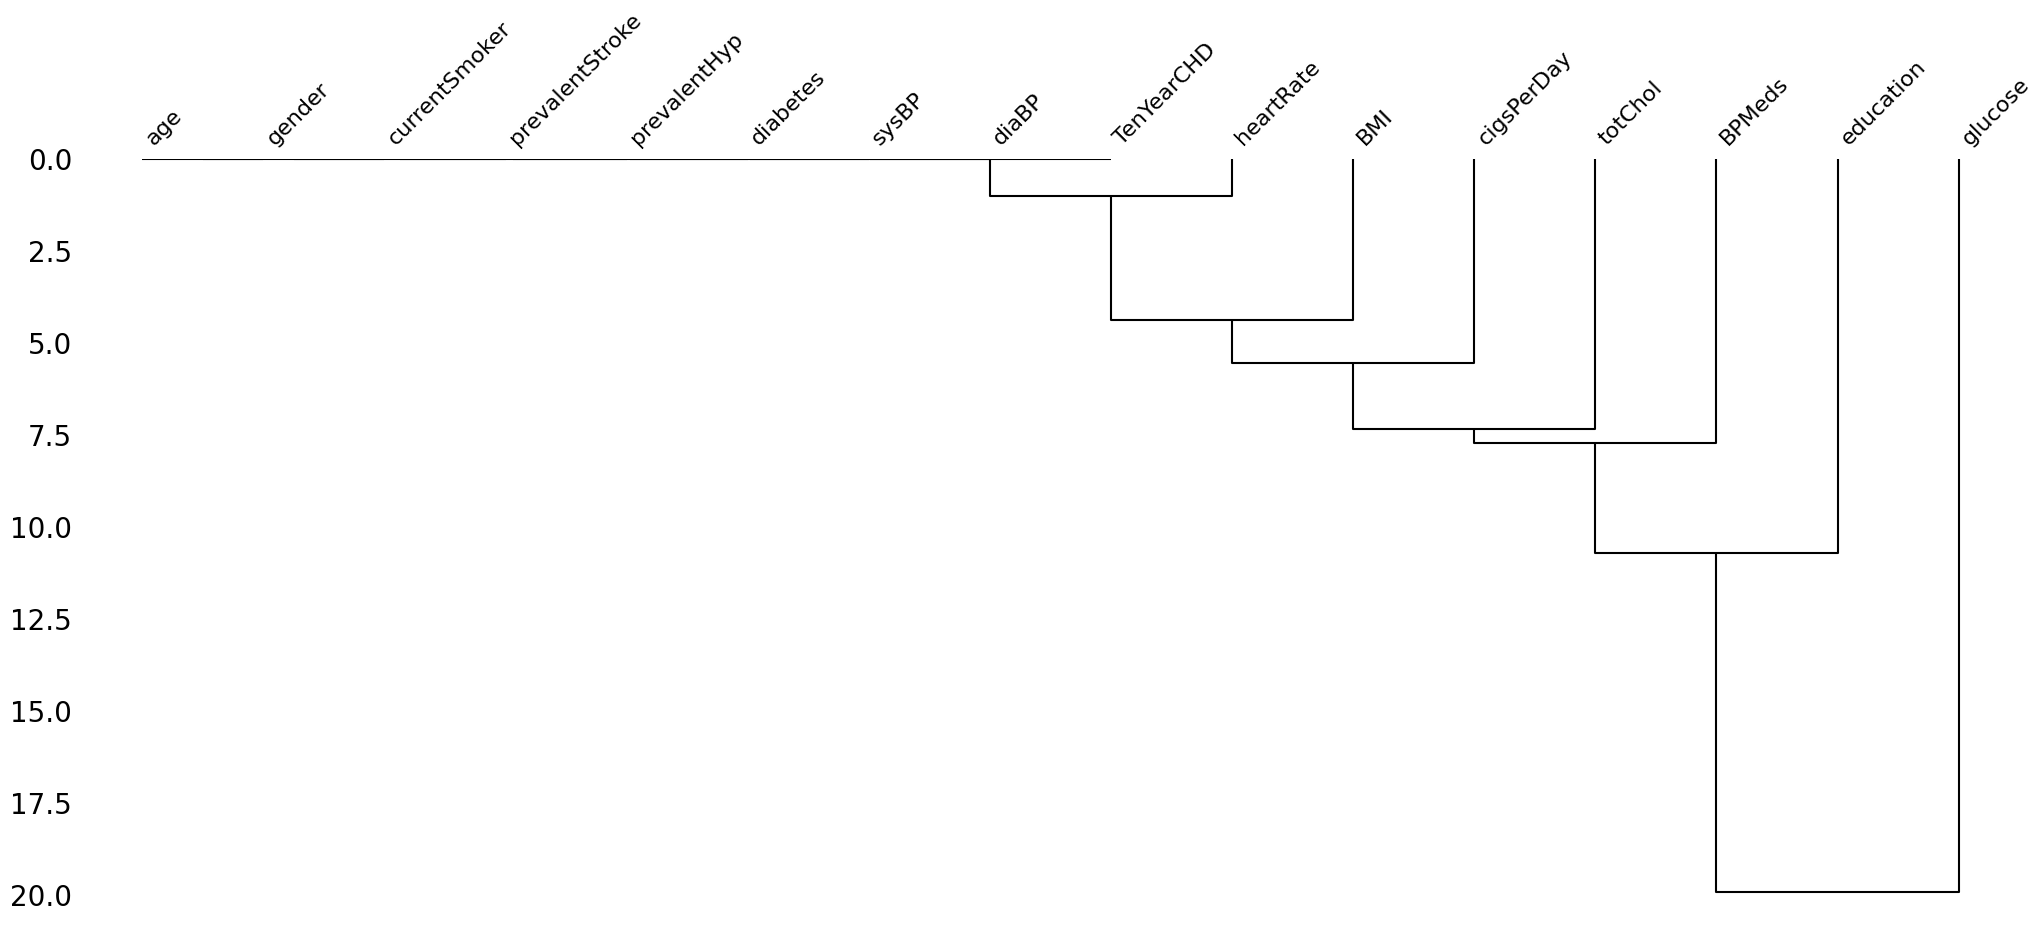

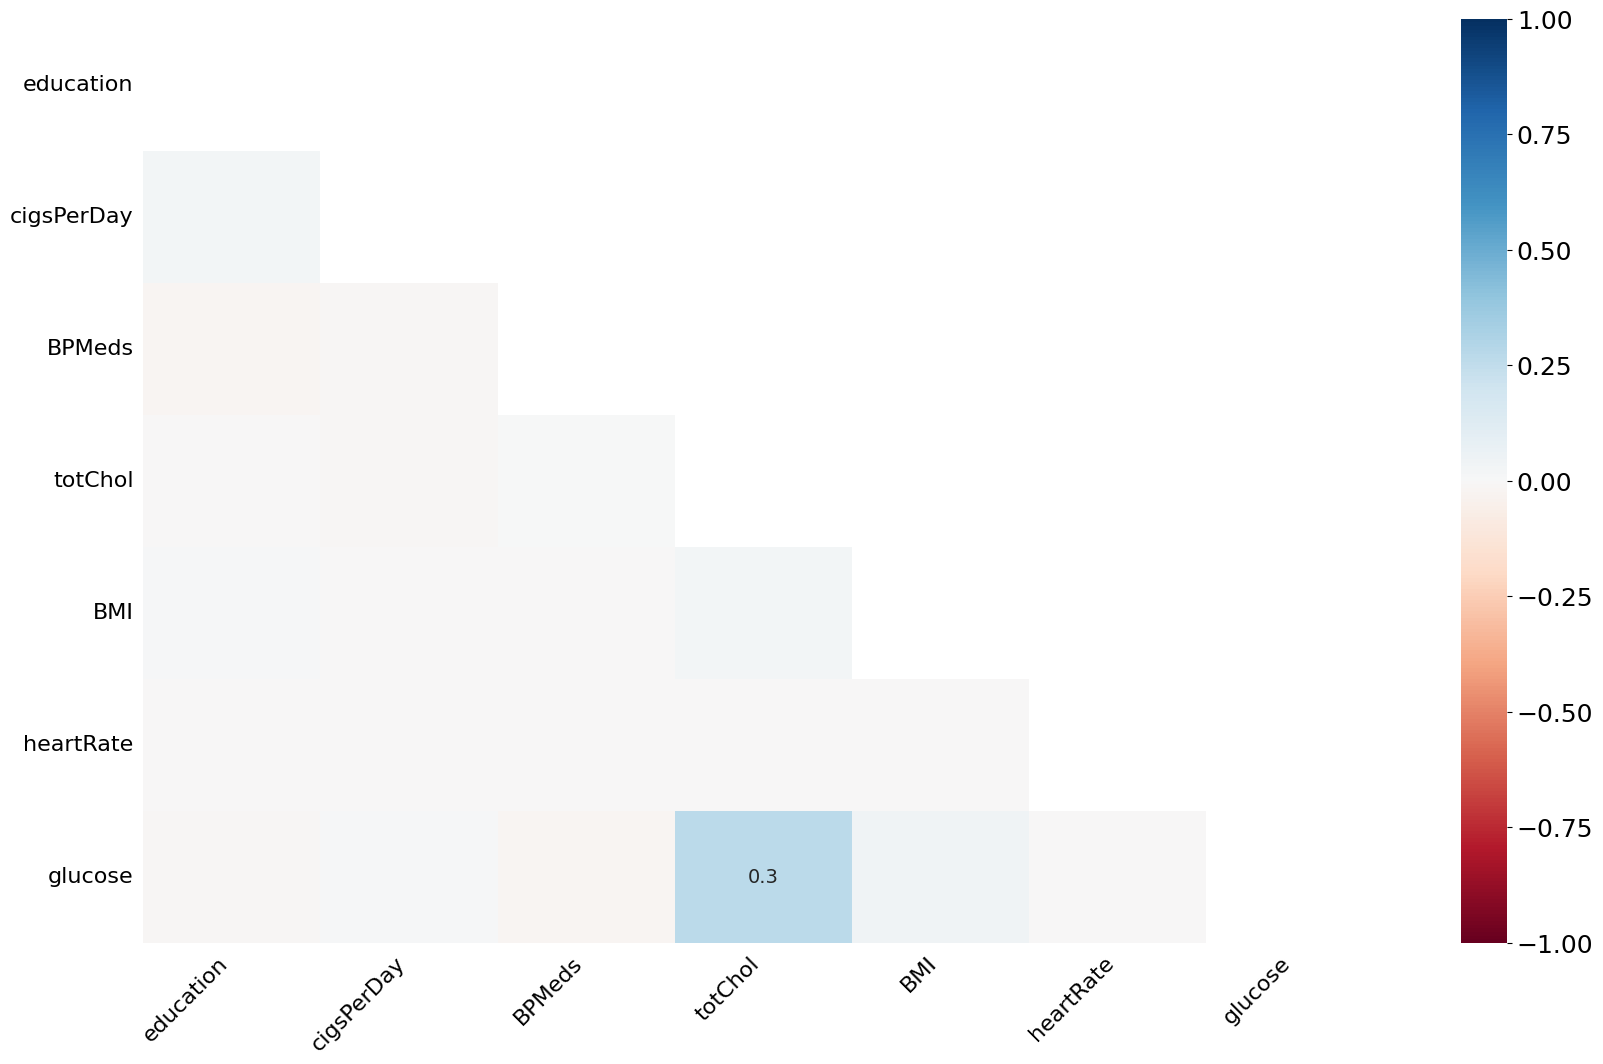

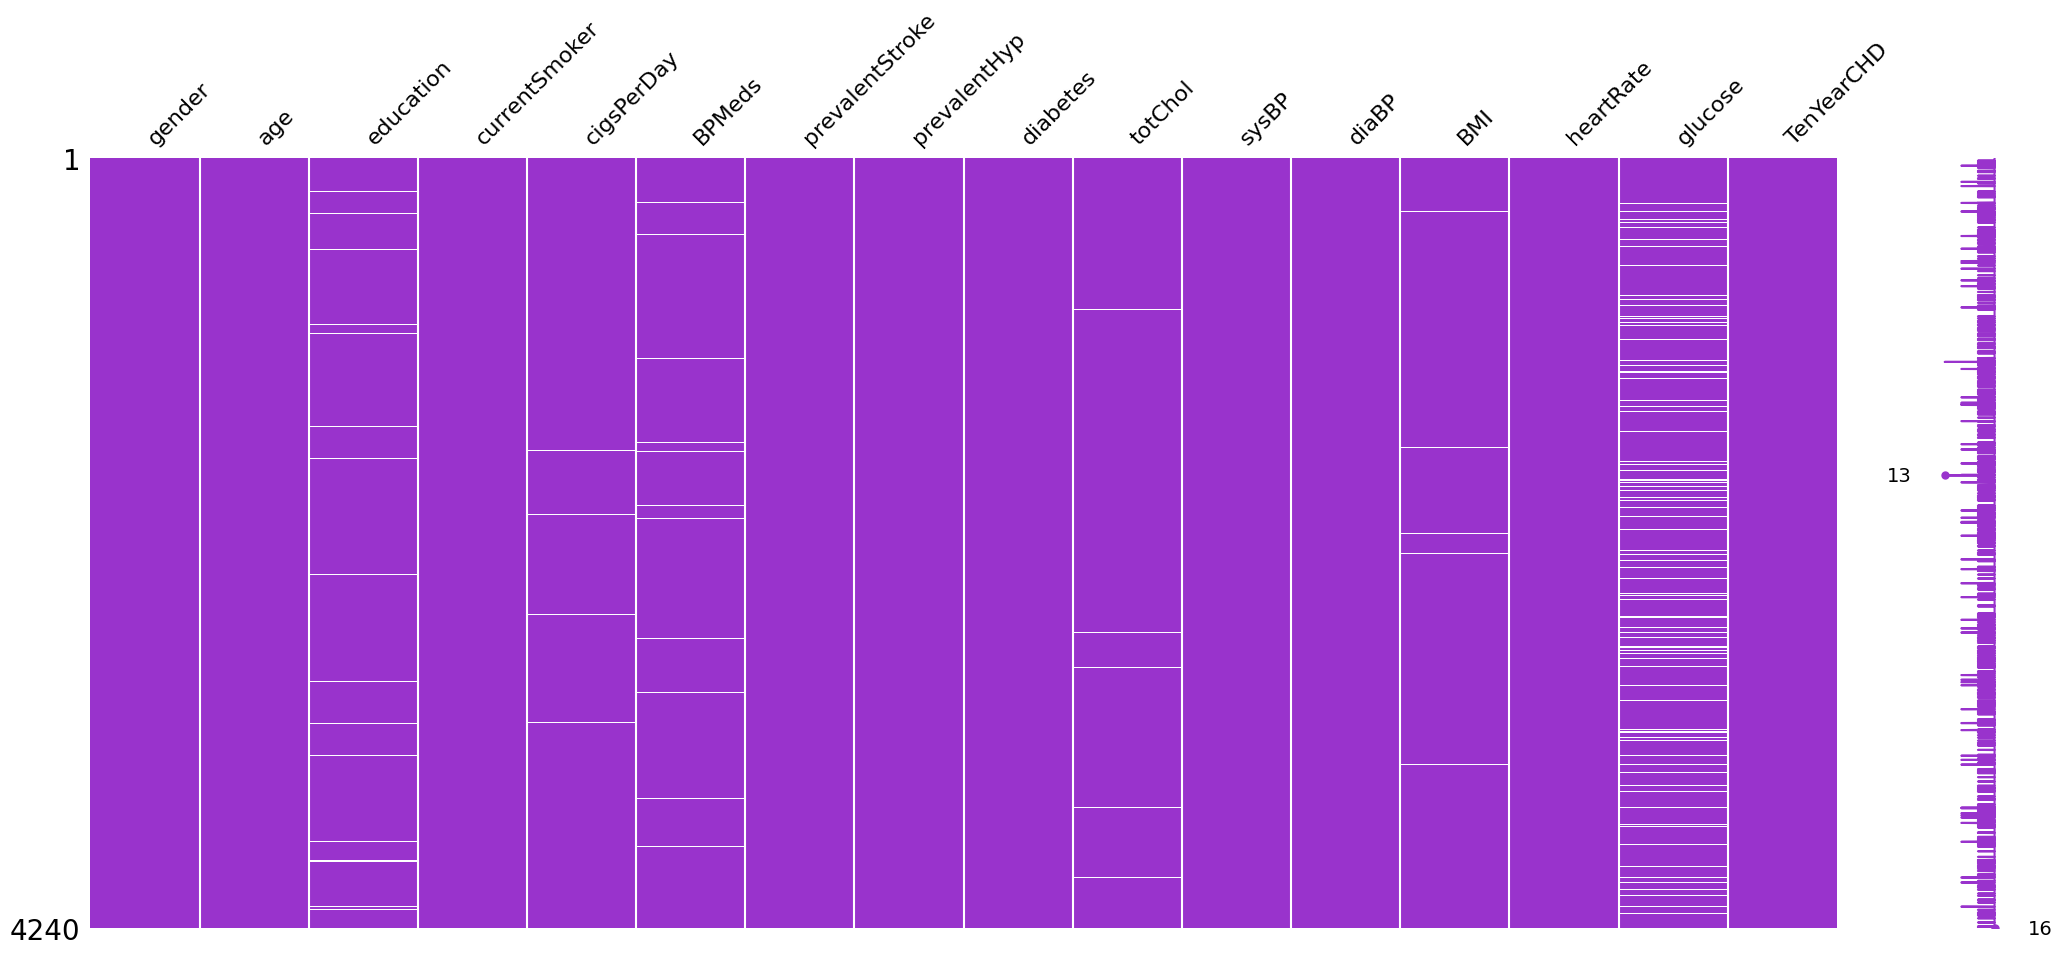

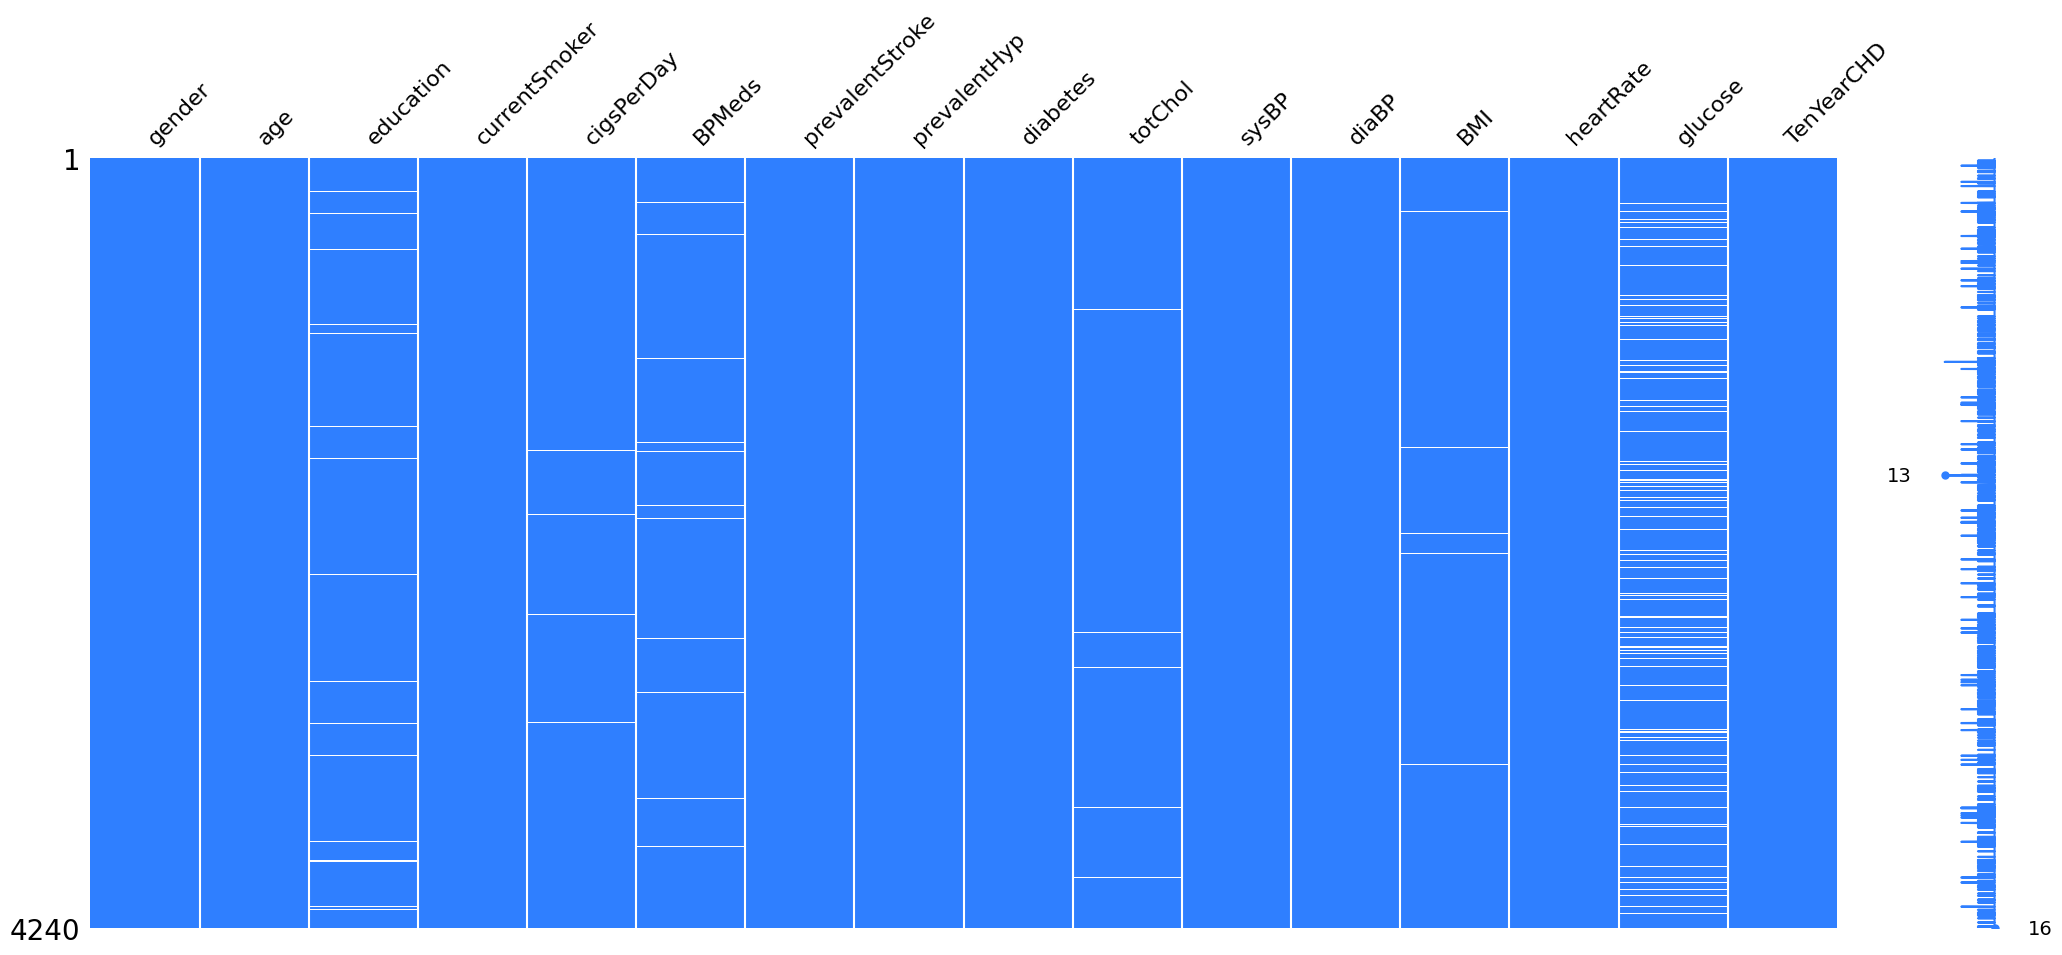

In [42]:
health_data = pd.read_csv("framingham.csv")
health_data.info()
health_data.shape
health_data.head()
health_data.describe()
health_data.isna().sum().sum()
health_data.isnull().sum().sort_values(ascending=False)
(health_data.isnull().sum() / health_data.isnull().count()).sort_values(ascending=False)
msno.dendrogram(health_data)
msno.heatmap(health_data)
msno.matrix(health_data, color=(0.6, 0.2, 0.8)) 
msno.matrix(health_data,color=(47/255,127/255,255/255))



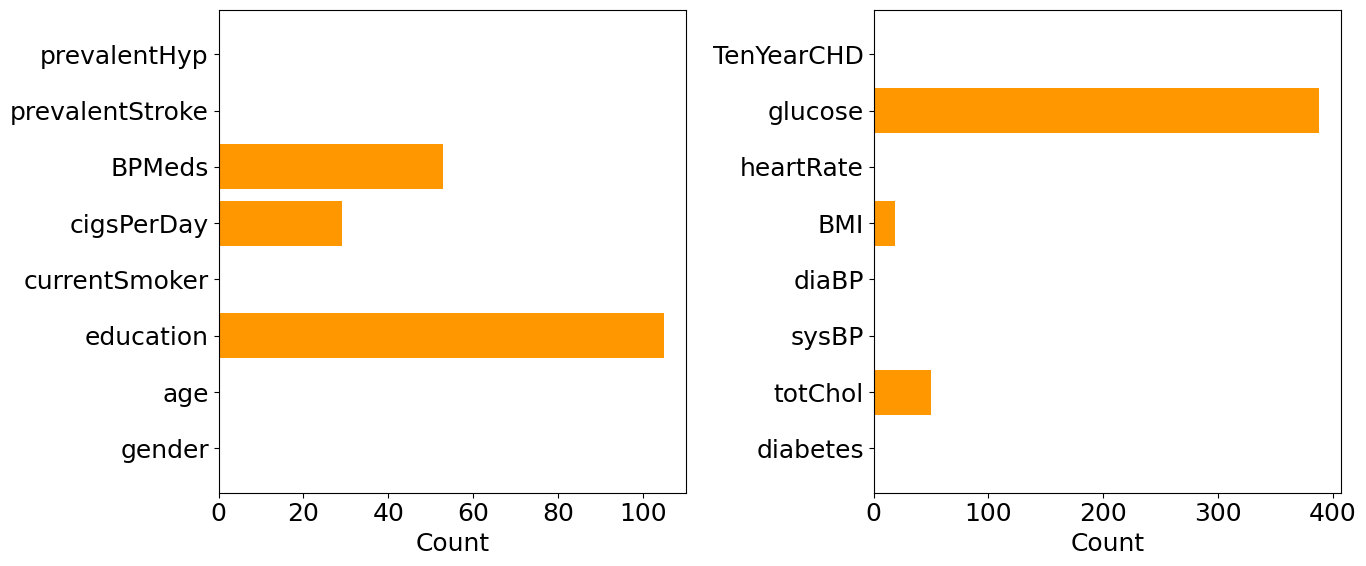

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

missing_counts = health_data.isnull().sum()

num_columns = len(missing_counts)
half = num_columns // 2
cols_part1 = missing_counts[:half]
cols_part2 = missing_counts[half:]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

axes[0].barh(cols_part1.index, cols_part1.values, color=(255/255, 151/255, 0/255))
#axes[0].set_title("Missing Values")
axes[0].set_xlabel("Count")

axes[1].barh(cols_part2.index, cols_part2.values, color=(255/255, 151/255, 0/255))
#axes[1].set_title("Missing Values")
axes[1].set_xlabel("Count")

plt.tight_layout()
plt.show()


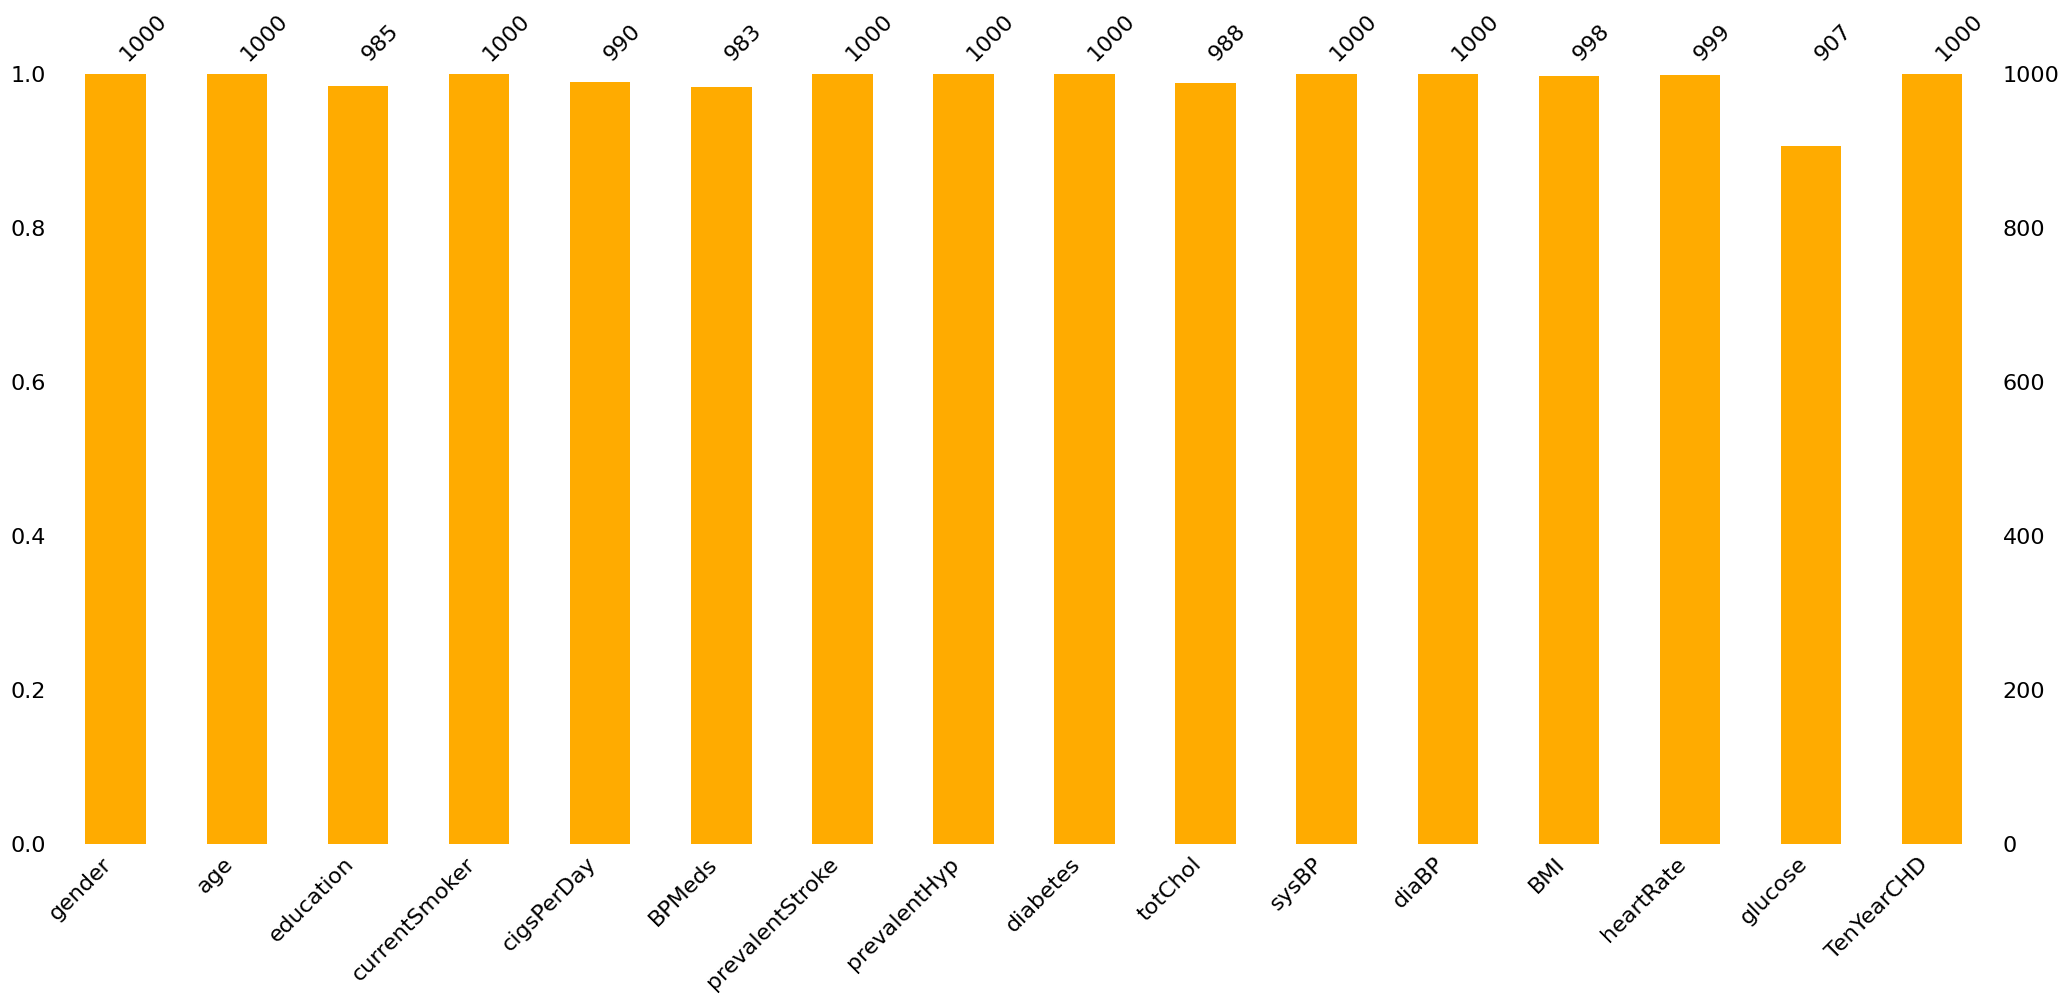

In [44]:
msno.bar(health_data.sample(1000), color=(255/255,151/225,0/255))
plt.show()

In [45]:
health_data.TenYearCHD.value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [46]:
numerical_features = health_data.columns[health_data.dtypes != object]
list(numerical_features)

['gender',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

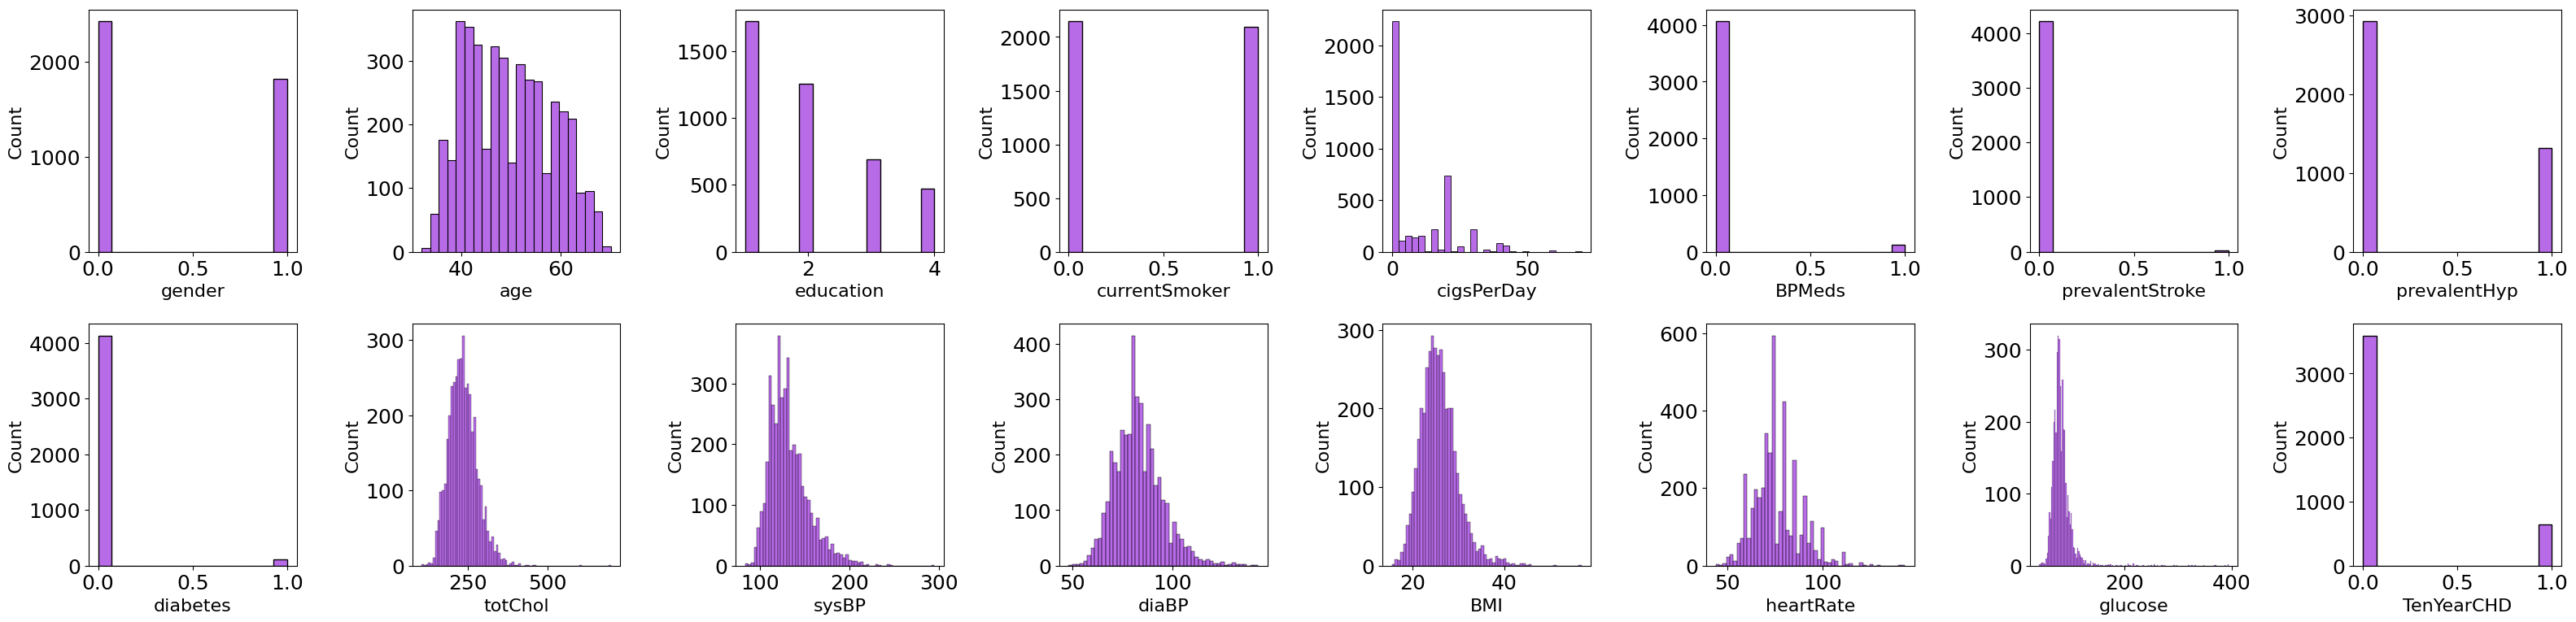

In [47]:
num_features = len(health_data.columns)  
num_rows = 2  
num_cols = (num_features + num_rows - 1) // num_rows 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))

axes = axes.flatten()

for i, col in enumerate(health_data.columns):
    sns.histplot(x=col, data=health_data, ax=axes[i], color=(159/255, 57/255, 222/255))

    axes[i].set_xlabel(col, fontsize=16) 
    axes[i].set_ylabel("Count", fontsize=16)  

plt.tight_layout()
plt.show()

In [48]:
health_data_filled_with_mean = pd.DataFrame()
for col in health_data.columns:
    if health_data[col].dtype == 'float64':
        health_data_filled_with_mean[col] = health_data[col].fillna(health_data[col].mean())
    elif set(health_data[col].dropna().unique()).issubset({0, 1}):
        health_data_filled_with_mean[col] = health_data[col].fillna(health_data[col].median())
    else:
        health_data_filled_with_mean[col] = health_data[col]



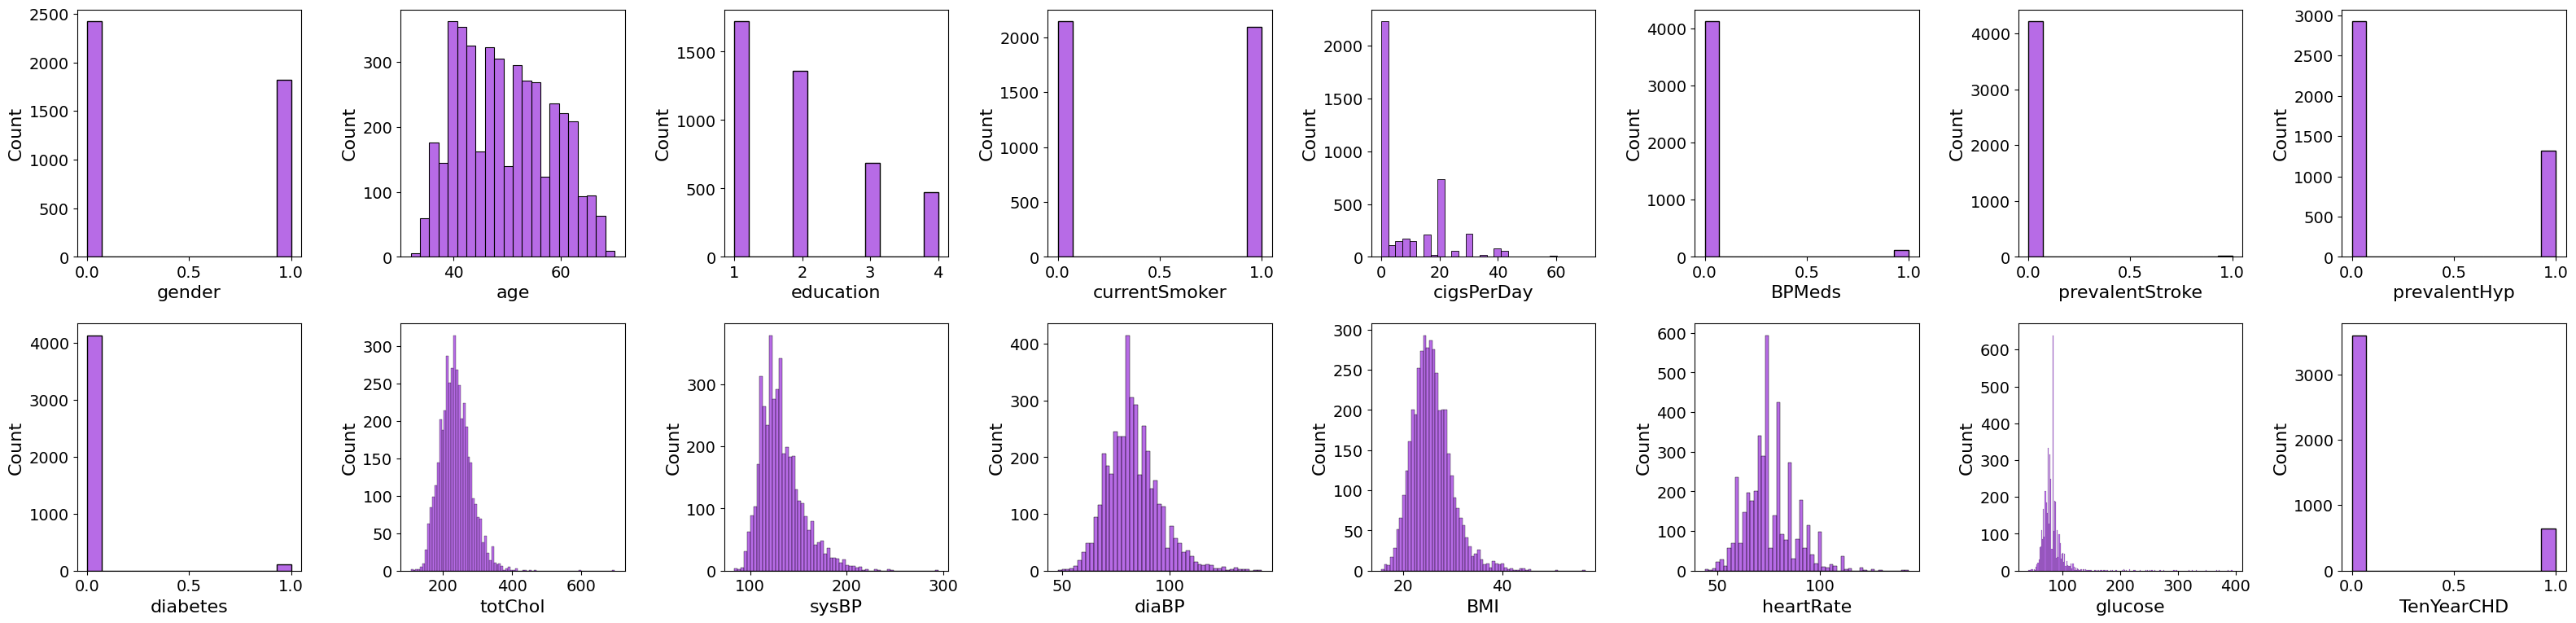

In [49]:
num_features = len(health_data_filled_with_mean.columns)  
num_rows = 2  
num_cols = (num_features + num_rows - 1) // num_rows  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))

axes = axes.flatten()

for i, col in enumerate(health_data_filled_with_mean.columns):
    sns.histplot(x=col, data=health_data_filled_with_mean, ax=axes[i], color=(159/255, 57/255, 222/255))

    axes[i].set_xlabel(col, fontsize=16)
    axes[i].set_ylabel("Count", fontsize=16)

    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

In [50]:
health_data_filled_with_mean.isnull().sum().sort_values()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [51]:
health_data_filled_with_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [52]:
health_data_filled_with_mean['BPMeds'] = health_data_filled_with_mean['BPMeds'].astype('int64')

In [53]:
health_data_filled_with_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   int64  
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 530.1 KB


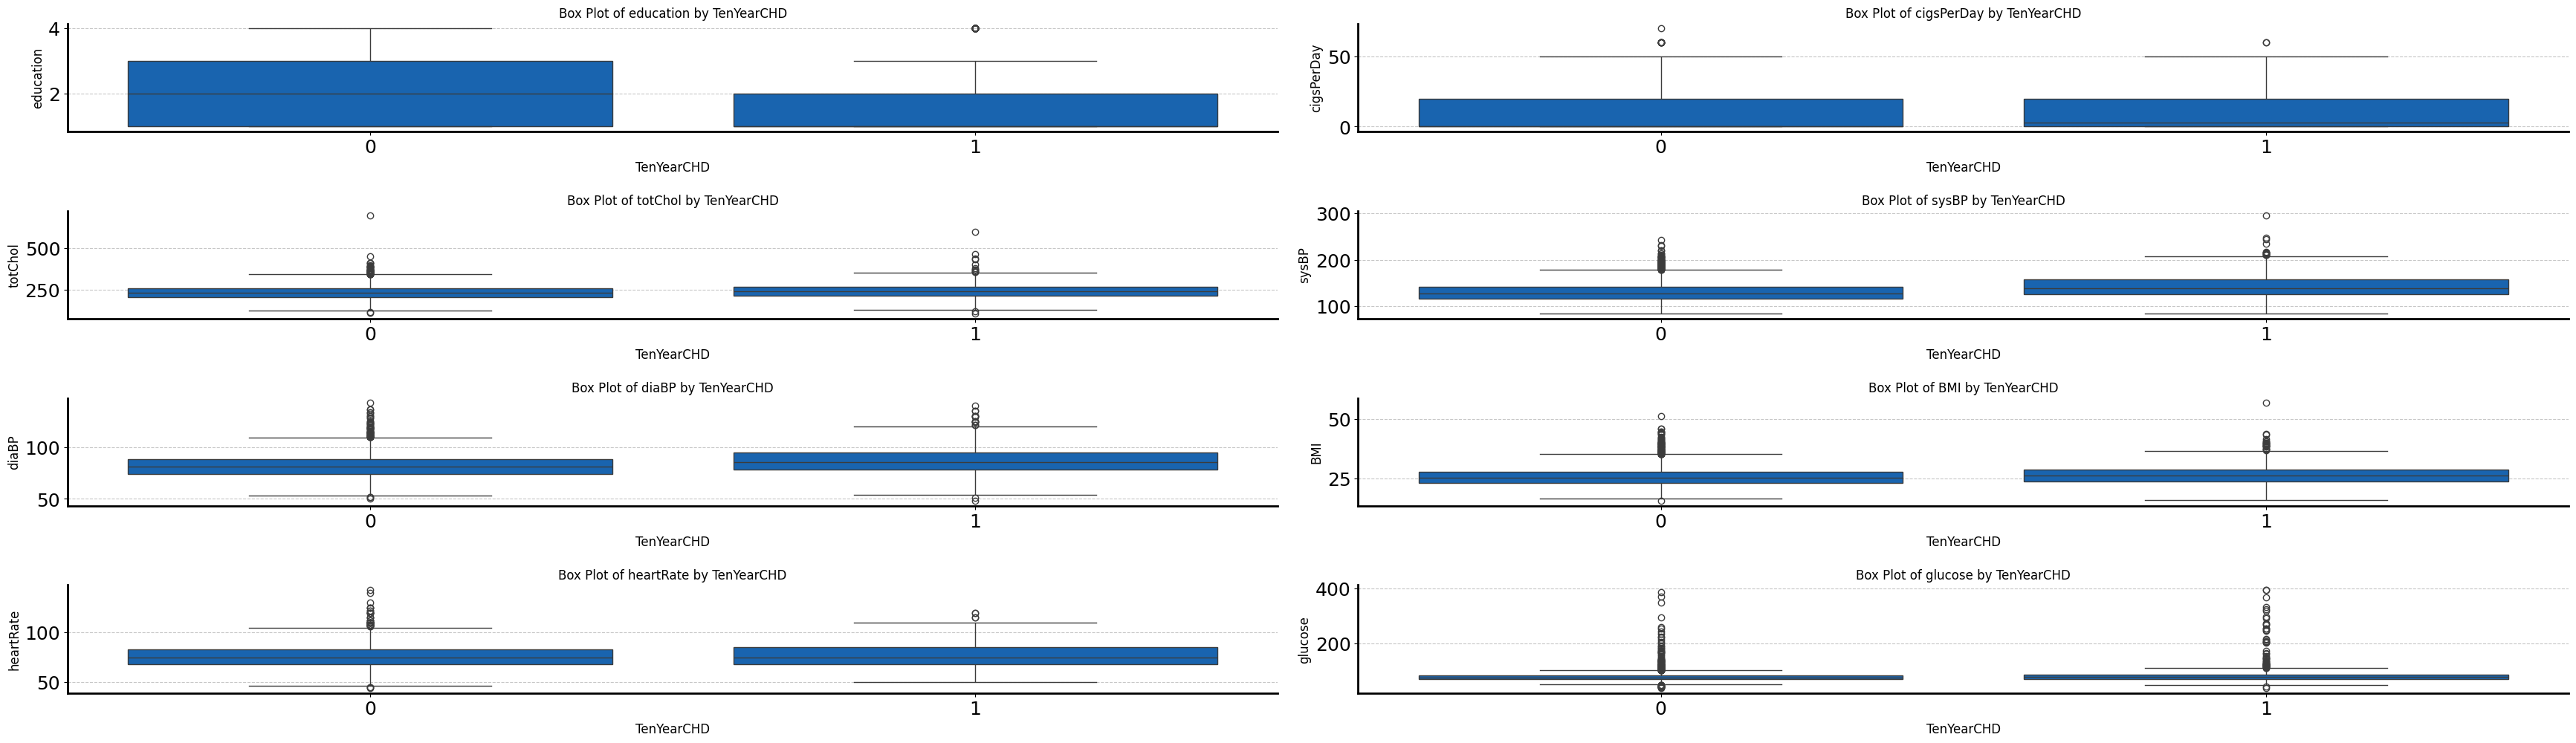

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'font.size': 18,            
    'font.weight': 'normal',    
    'axes.labelweight': 'normal',
    'axes.titleweight': 'normal'
})

fig = plt.figure(figsize=(35, 40))
fig.set_facecolor('white')  

index = 1
target_col = 'TenYearCHD'

box_color = (0/255, 100/255, 200/255)  

for k in health_data_filled_with_mean:
    if health_data_filled_with_mean[k].dtype == 'float64':
        ax = plt.subplot(len(numerical_features), 2, index)

        sns.boxplot(
            x=health_data_filled_with_mean[target_col].astype(str),  
            y=health_data_filled_with_mean[k],
            color=box_color  
        )

        plt.title(f'Box Plot of {k} by {target_col}', fontsize=12, fontweight='normal')
        plt.xlabel('TenYearCHD', fontsize=12, fontweight='normal')
        plt.ylabel(k, fontsize=12, fontweight='normal')

        ax.yaxis.grid(True, linestyle='--', alpha=0.7)
        for spine in ax.spines.values():
            spine.set_edgecolor('darkblue')  
            spine.set_linewidth(2)  
            spine.set_linestyle('-')  

        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        ax.spines['left'].set_color('black')  
        ax.spines['bottom'].set_color('black')  

        index += 1

plt.tight_layout()
plt.show()


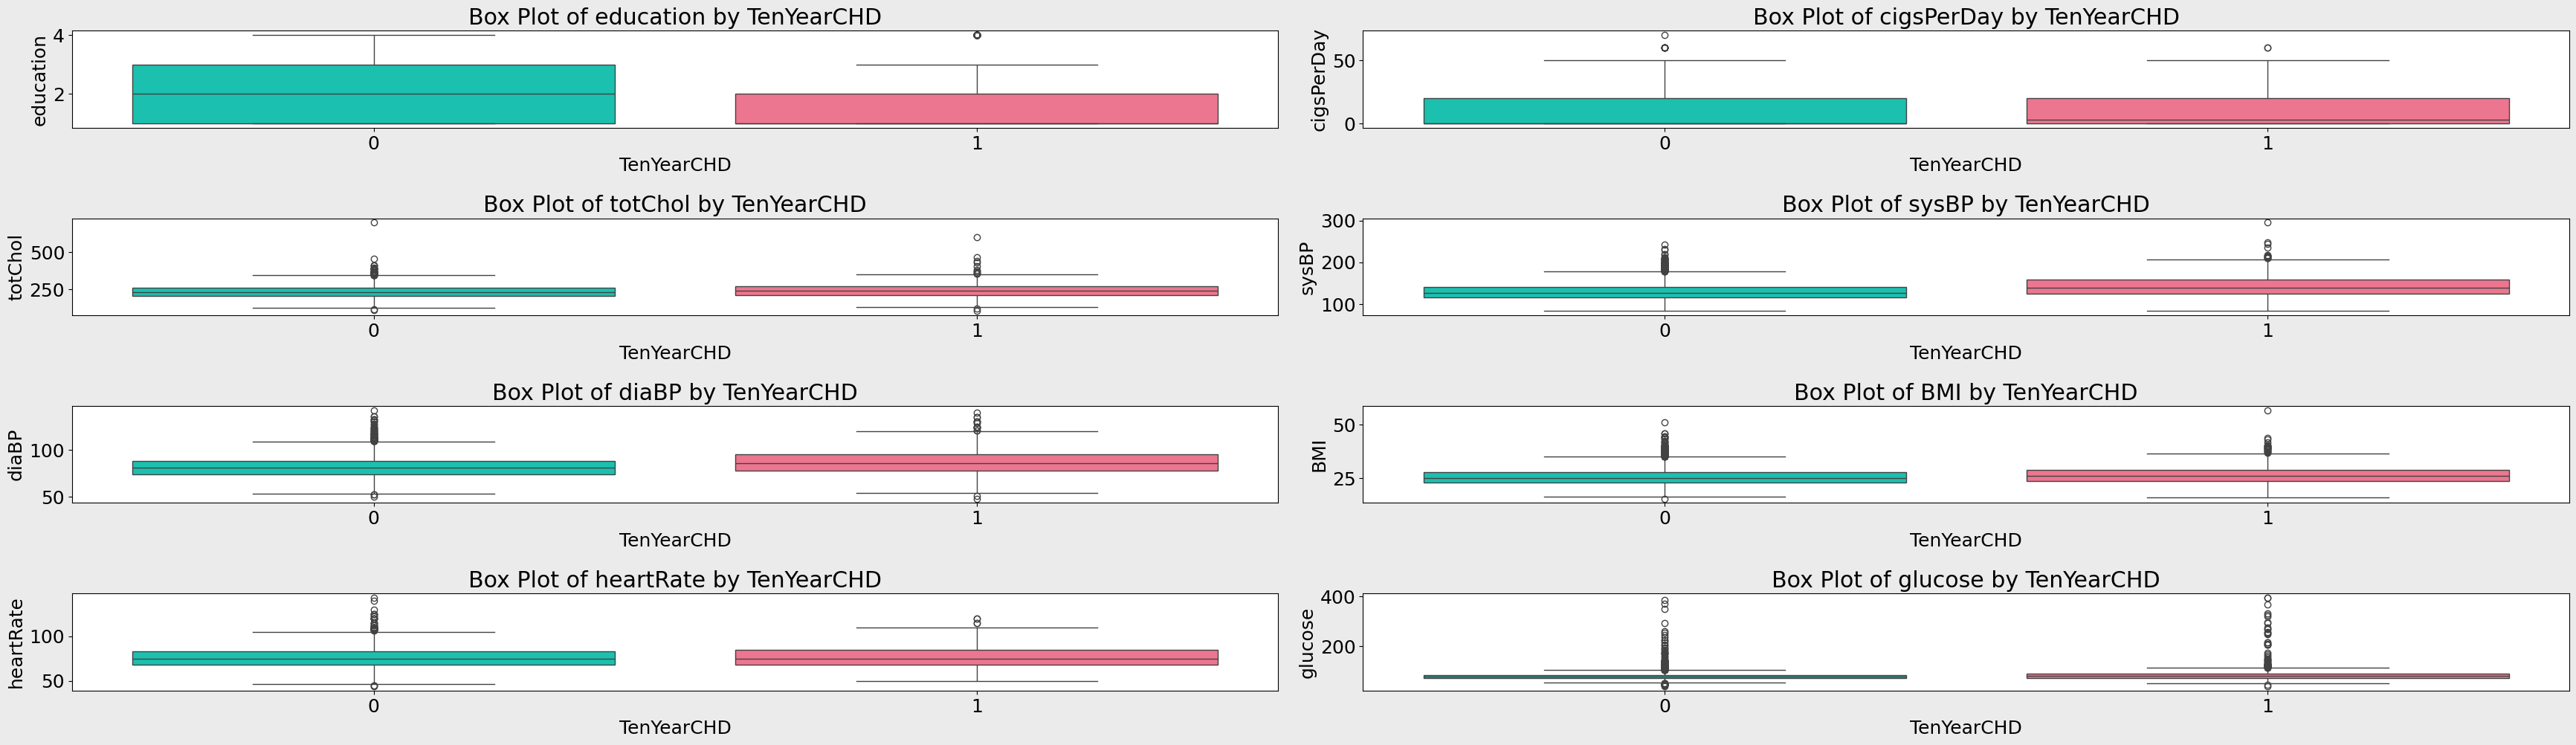

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(35, 40))
fig.set_facecolor((235/255, 235/255, 235/255))

index = 1
target_col = 'TenYearCHD'

for k in health_data_filled_with_mean:
    if health_data_filled_with_mean[k].dtype == 'float64':
        plt.subplot(len(numerical_features), 2, index)
        sns.boxplot(
            x=health_data_filled_with_mean[target_col].astype(str),  
            y=health_data_filled_with_mean[k],
            palette={'0': (0/255, 219/255, 197/255), '1': (255/255, 99/255, 132/255)}   
        )
        plt.title(f'Box Plot of {k} by {target_col}')
        plt.xlabel('TenYearCHD')
        plt.ylabel(k)
        index += 1

plt.tight_layout()
plt.show()


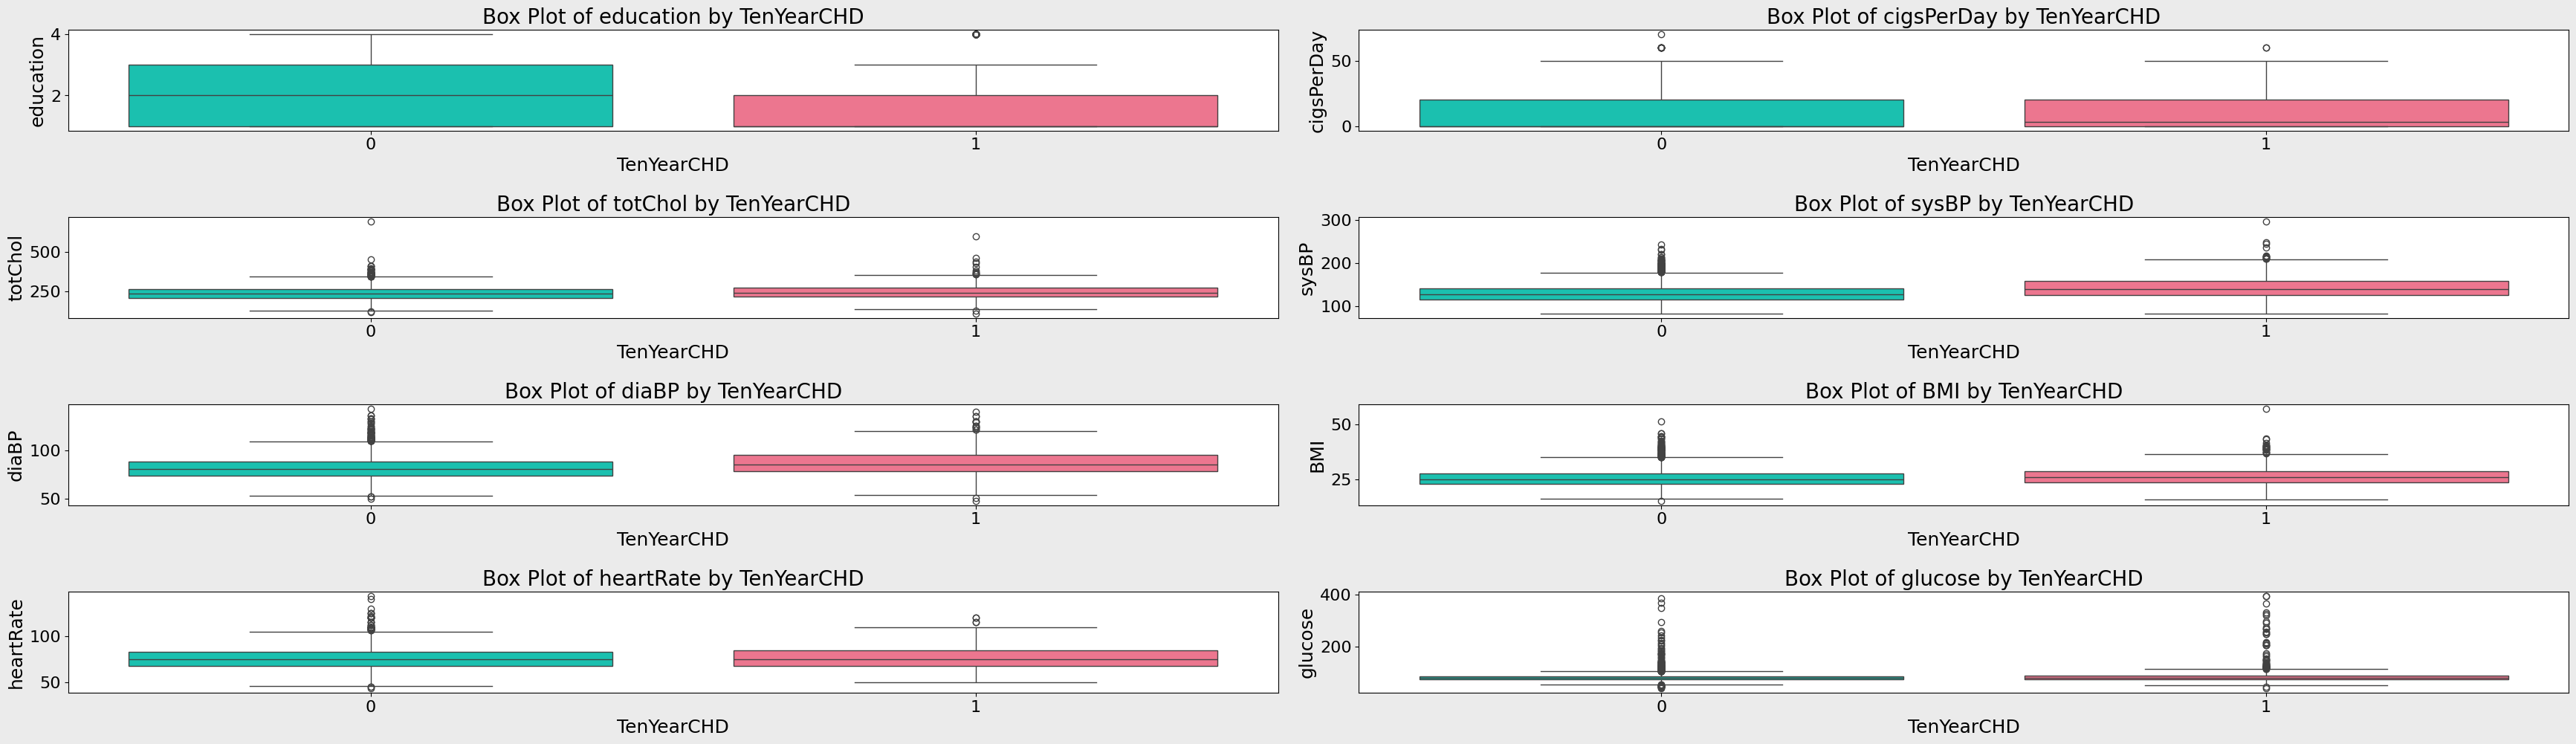

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(35, 40))
fig.set_facecolor((235/255, 235/255, 235/255))

index = 1
target_col = 'TenYearCHD'

for k in health_data_filled_with_mean:
    if health_data_filled_with_mean[k].dtype == 'float64':
        plt.subplot(len(numerical_features), 2, index)
        sns.boxplot(
            x=health_data_filled_with_mean[target_col].astype(str), 
            y=health_data_filled_with_mean[k],
            palette={'0': (0/255, 219/255, 197/255), '1': (255/255, 99/255, 132/255)}
        )
        plt.title(f'Box Plot of {k} by {target_col}', fontsize=20)  
        plt.xlabel('TenYearCHD', fontsize=18)  
        plt.ylabel(k, fontsize=18)  
        plt.xticks(fontsize=16)  
        plt.yticks(fontsize=16) 
        index += 1

plt.tight_layout()
plt.show()


In [57]:
group_0 = health_data_filled_with_mean[health_data_filled_with_mean['TenYearCHD'] == 0]

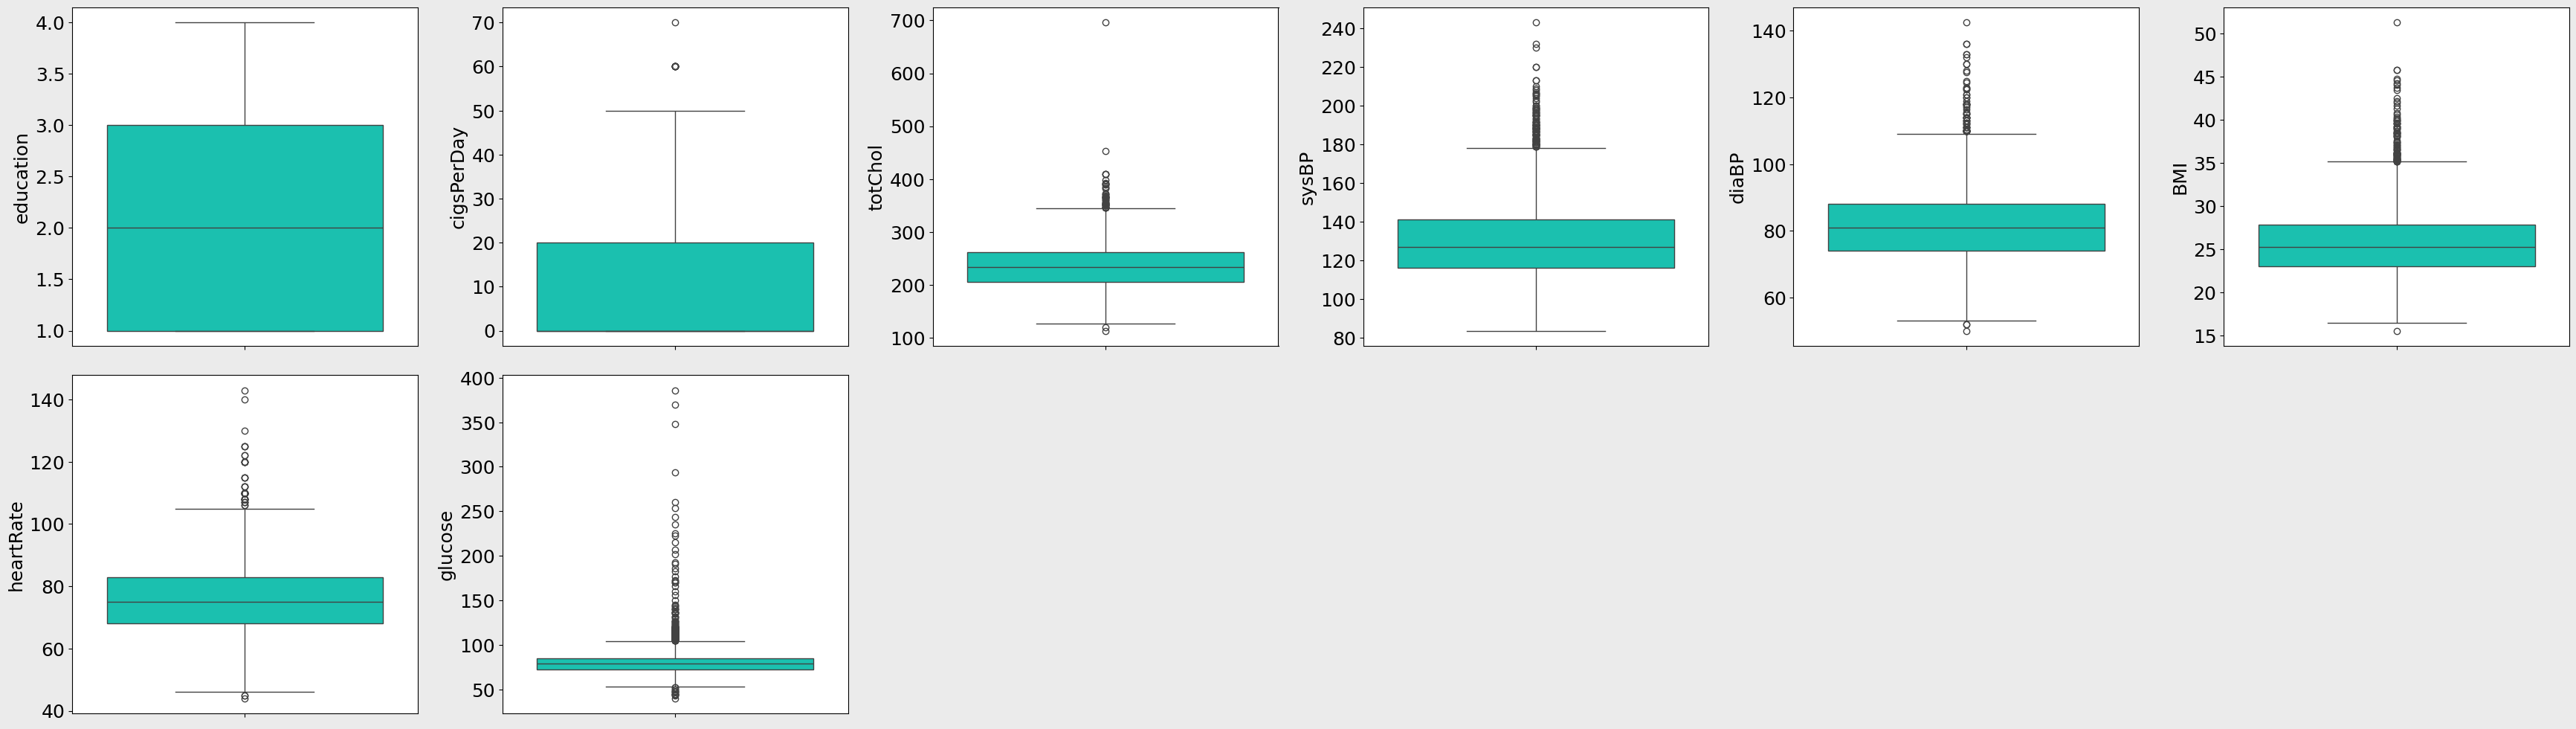

In [58]:
fig = plt.figure(figsize=(35,20))
fig.set_facecolor((235/255,235/255,235/255))
index = 1
for k in group_0:
    if group_0[k].dtype=='float64':
        plt.subplot(4, 6, index)
        sns.boxplot(group_0[k], color=(0/255,219/255,197/255))
        index += 1
plt.tight_layout()
plt.show()

In [59]:
for col in group_0.columns:
    if col != 'TenYearCHD' and group_0[col].dtype == 'float64':
        Q1 = group_0[col].quantile(0.25)
        Q3 = group_0[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        group_0[col] = np.where(group_0[col] < lower_bound, lower_bound, group_0[col])
        group_0[col] = np.where(group_0[col] > upper_bound, upper_bound, group_0[col])

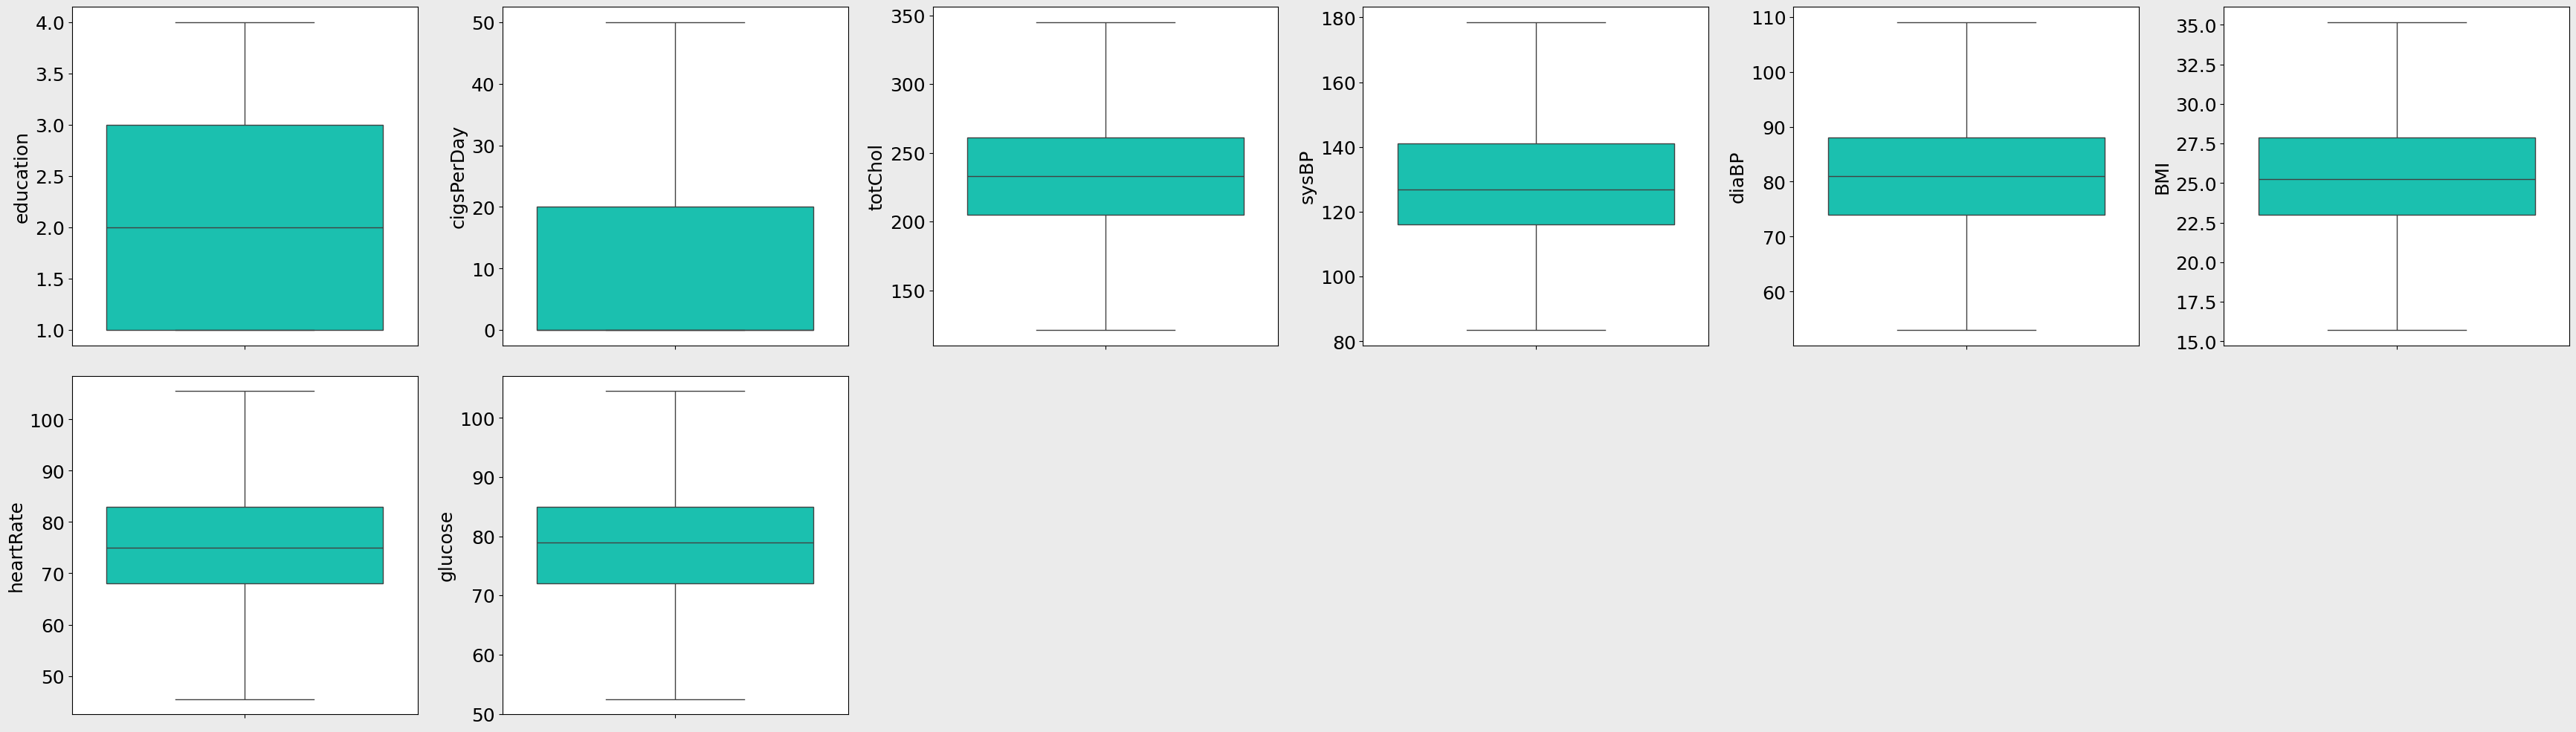

In [60]:
fig = plt.figure(figsize=(35,20))
fig.set_facecolor((235/255,235/255,235/255))
index = 1
for k in group_0:
    if group_0[k].dtype=='float64':
        plt.subplot(4, 6, index)
        sns.boxplot(group_0[k], color=(0/255,219/255,197/255))
        index += 1
plt.tight_layout()
plt.show()

In [61]:
group_1 = health_data_filled_with_mean[health_data_filled_with_mean['TenYearCHD'] == 1]

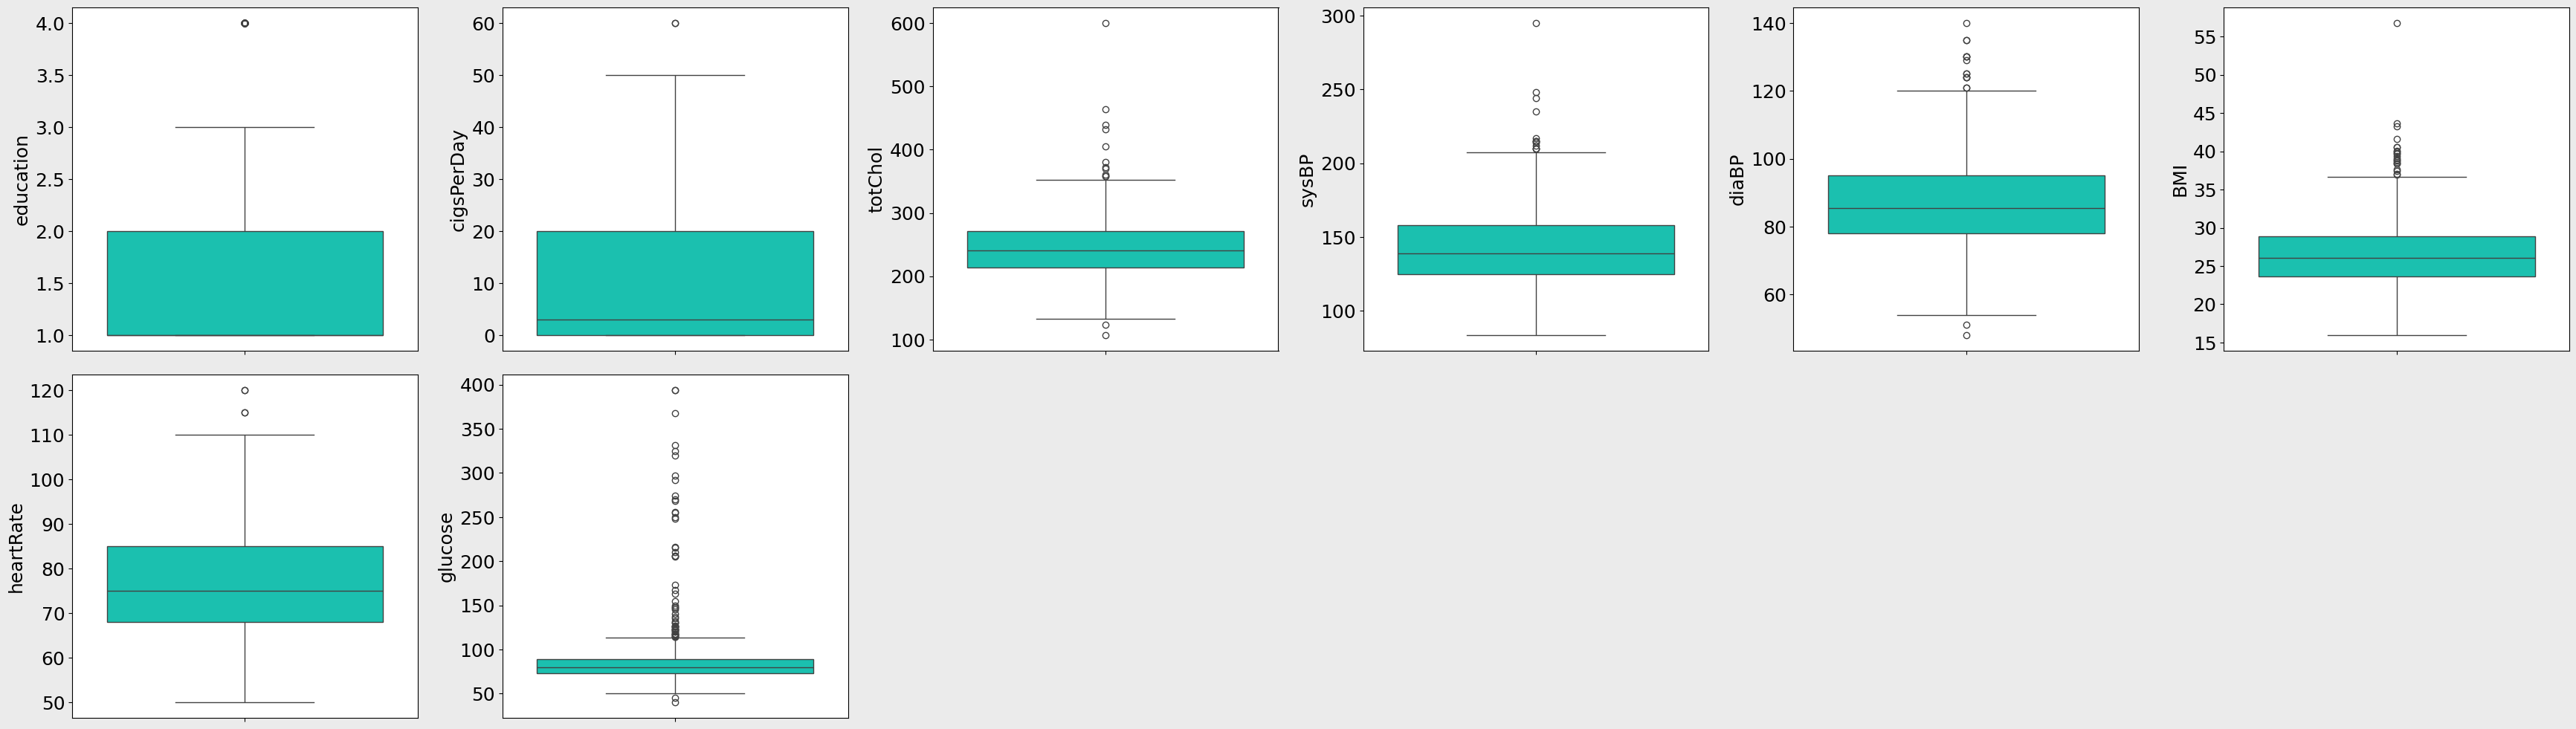

In [62]:
fig = plt.figure(figsize=(35,20))
fig.set_facecolor((235/255,235/255,235/255))
index = 1
for k in group_1:
    if group_1[k].dtype=='float64':
        plt.subplot(4, 6, index)
        sns.boxplot(group_1[k], color=(0/255,219/255,197/255))
        index += 1
plt.tight_layout()
plt.show()

In [63]:
for col in group_1.columns:
    if col != 'TenYearCHD' and group_1[col].dtype == 'float64':
        Q1 = group_1[col].quantile(0.25)
        Q3 = group_1[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        group_1[col] = np.where(group_1[col] < lower_bound, lower_bound, group_1[col])
        group_1[col] = np.where(group_1[col] > upper_bound, upper_bound, group_1[col])

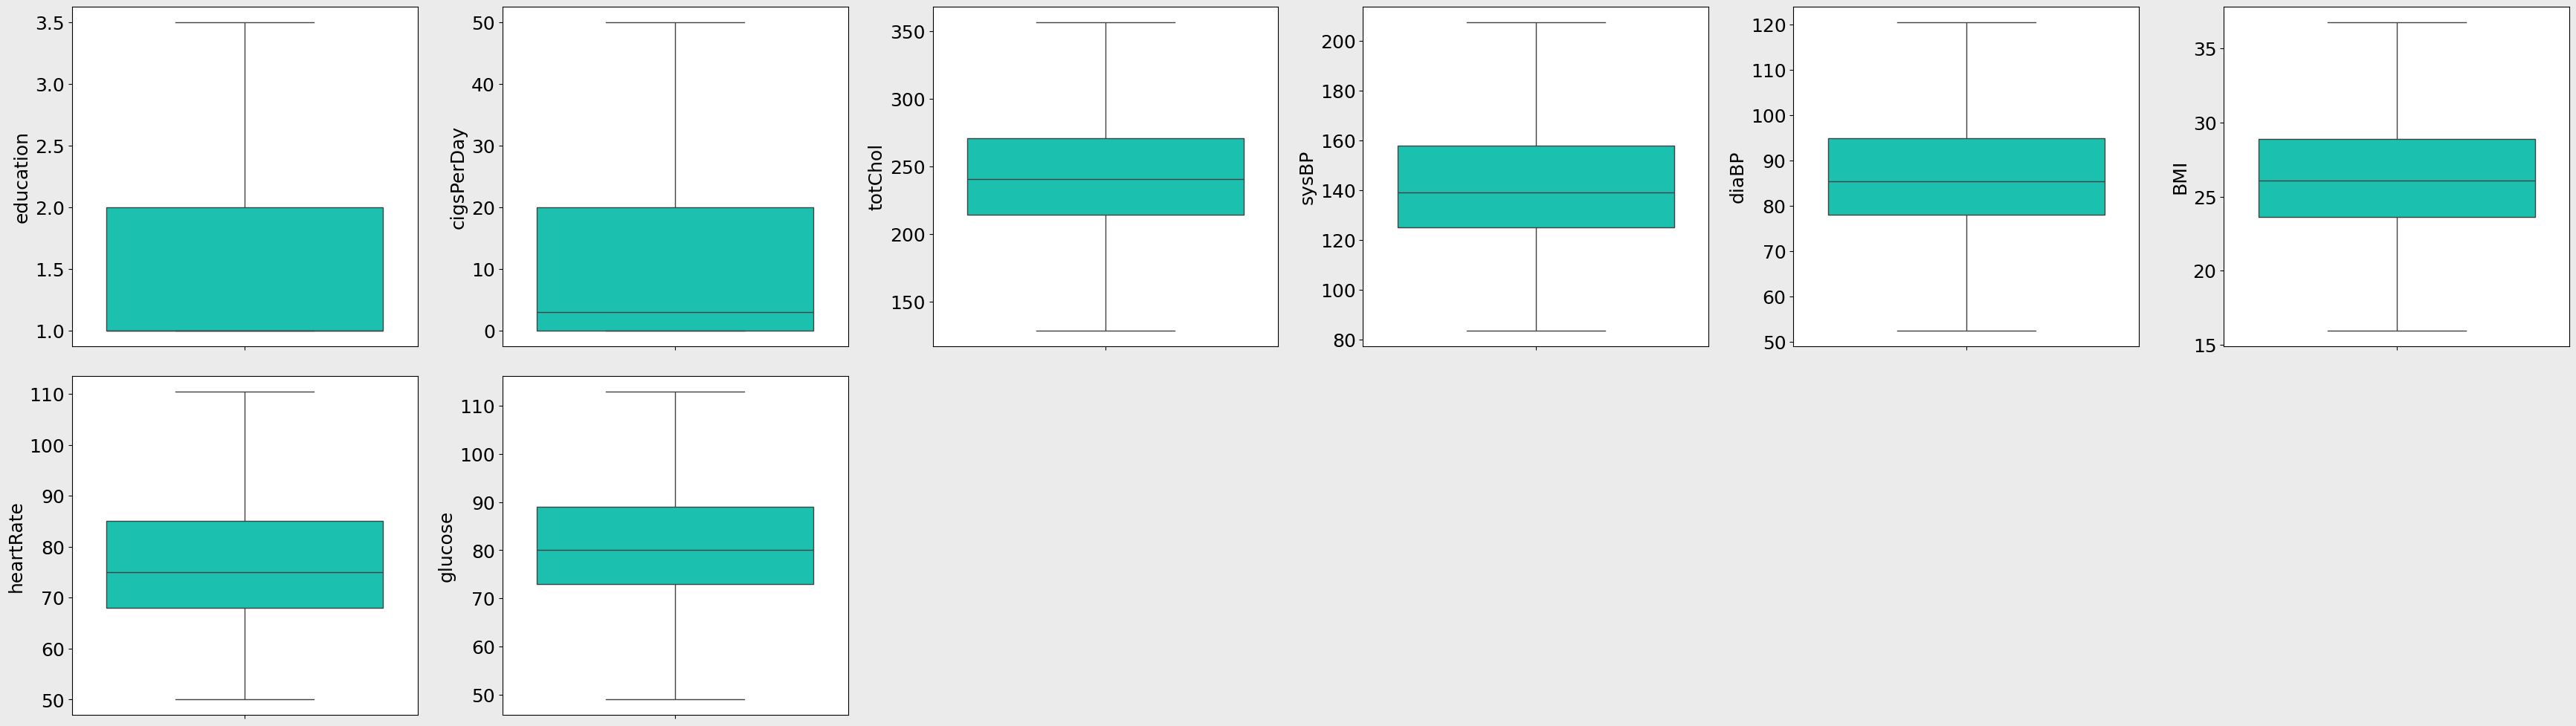

In [64]:
fig = plt.figure(figsize=(35,20))
fig.set_facecolor((235/255,235/255,235/255))
index = 1
for k in group_1:
    if group_1[k].dtype=='float64':
        plt.subplot(4, 6, index)
        sns.boxplot(group_1[k], color=(0/255,219/255,197/255))
        index += 1
plt.tight_layout()
plt.show()

In [65]:
health_data_filled_with_mean = pd.concat([group_0, group_1])

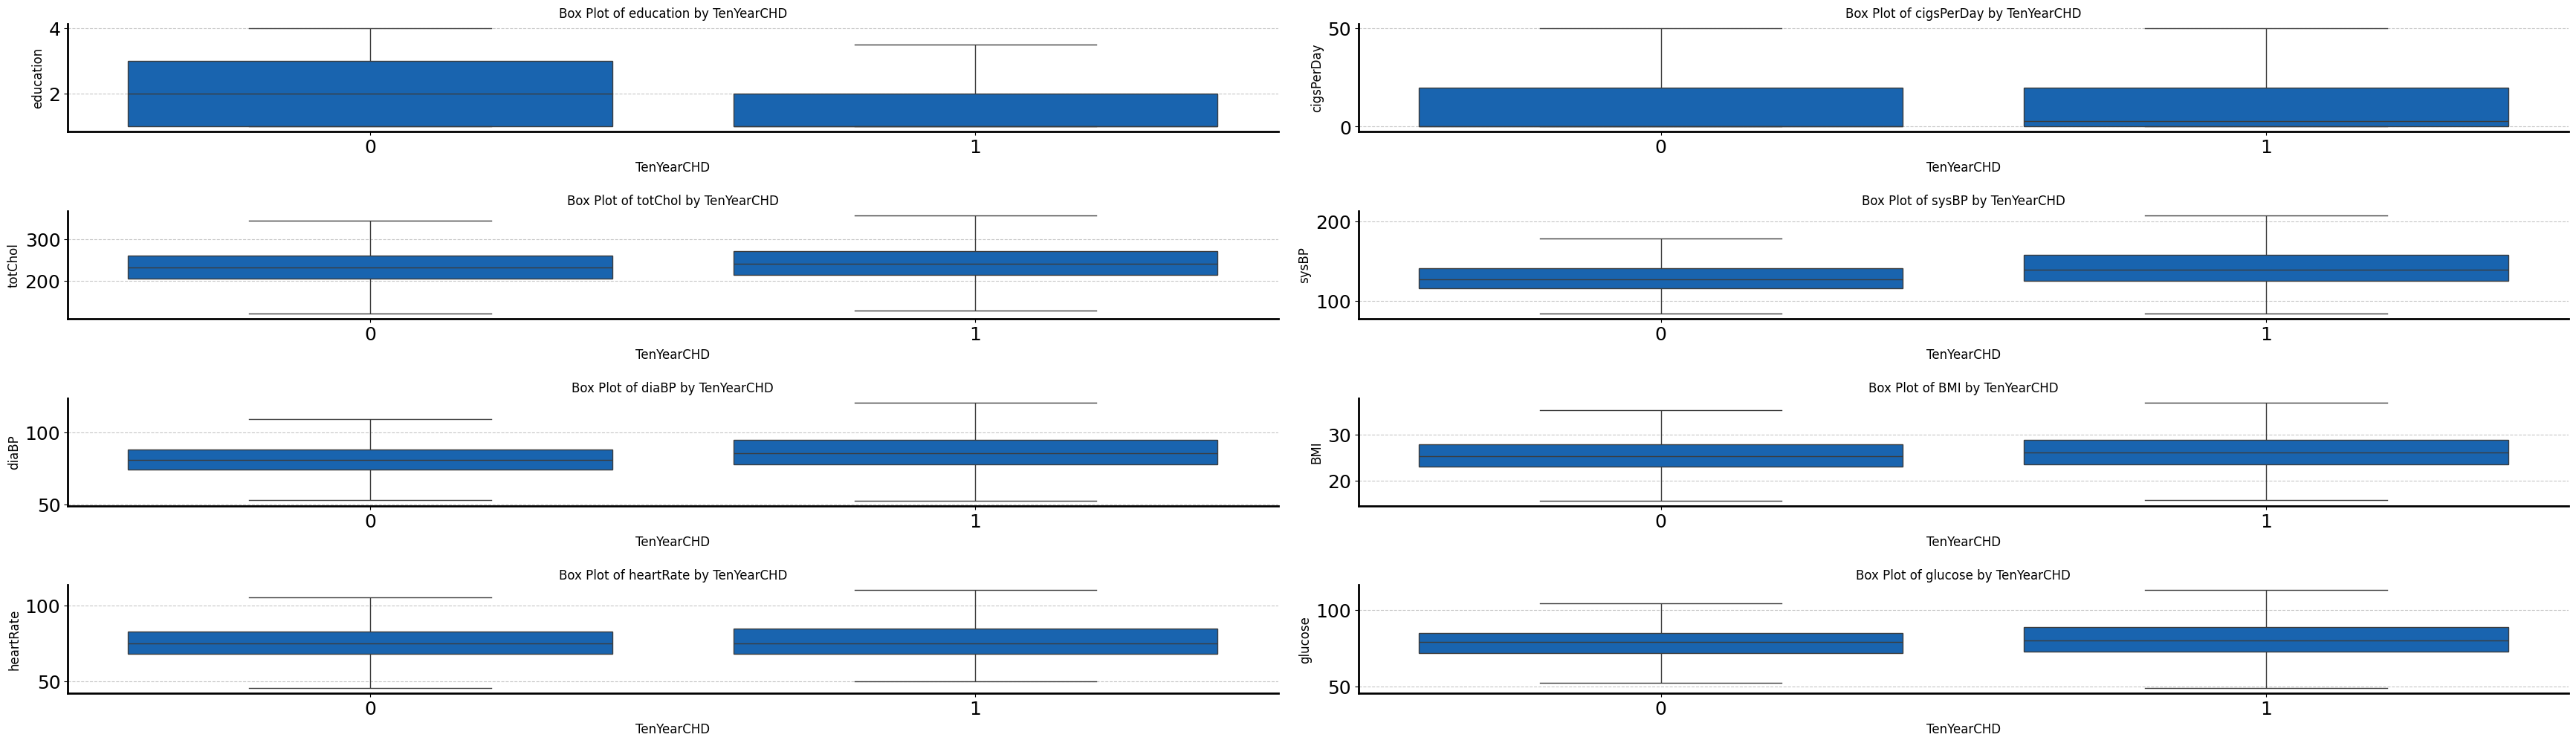

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams.update({
    'font.size': 18,            
    'font.weight': 'normal',    
    'axes.labelweight': 'normal',
    'axes.titleweight': 'normal'
})

fig = plt.figure(figsize=(35, 40))
fig.set_facecolor('white') 

index = 1
target_col = 'TenYearCHD'

box_color = (0/255, 100/255, 200/255)  

for k in health_data_filled_with_mean:
    if health_data_filled_with_mean[k].dtype == 'float64':
        ax = plt.subplot(len(numerical_features), 2, index)

        sns.boxplot(
            x=health_data_filled_with_mean[target_col].astype(str),  
            y=health_data_filled_with_mean[k],
            color=box_color  
        )

        plt.title(f'Box Plot of {k} by {target_col}', fontsize=12, fontweight='normal')
        plt.xlabel('TenYearCHD', fontsize=12, fontweight='normal')
        plt.ylabel(k, fontsize=12, fontweight='normal')

        ax.yaxis.grid(True, linestyle='--', alpha=0.7)

        for spine in ax.spines.values():
            spine.set_edgecolor('darkblue')  
            spine.set_linewidth(2)  
            spine.set_linestyle('-')  

        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        ax.spines['left'].set_color('black')  
        ax.spines['bottom'].set_color('black')  

        index += 1

plt.tight_layout()
plt.show()


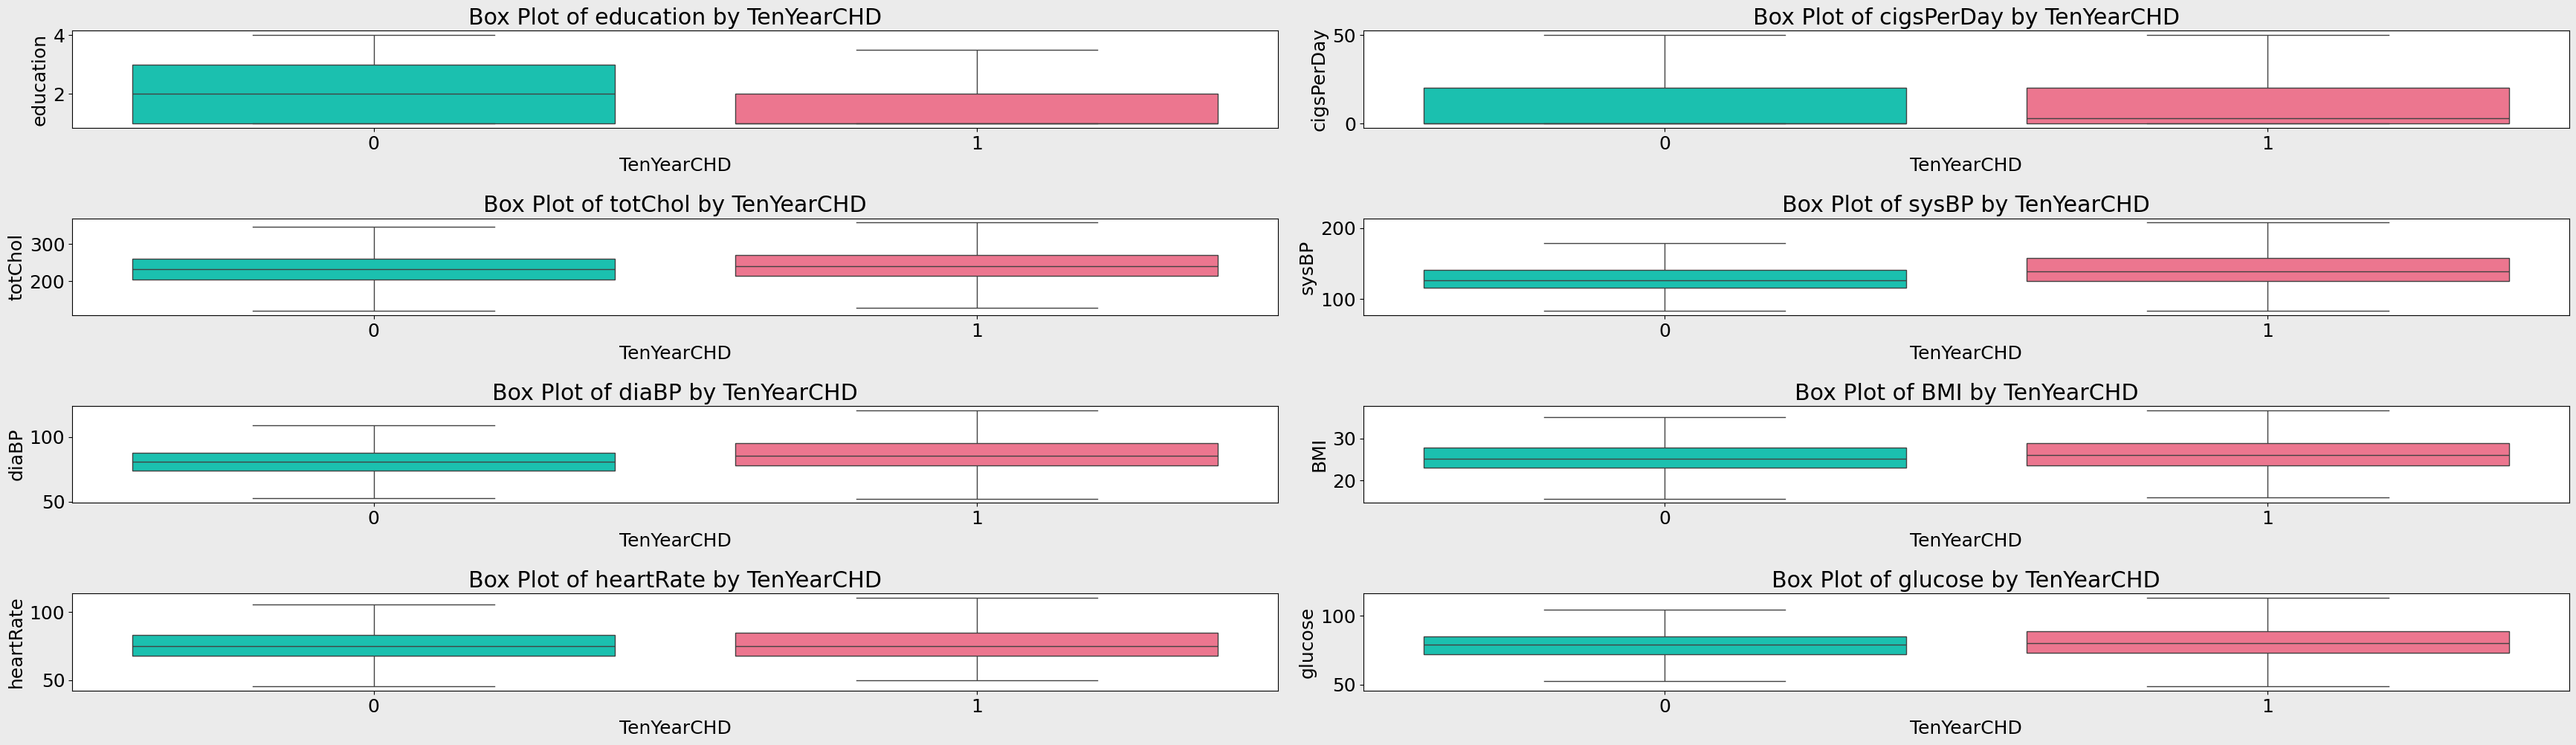

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(35, 40))
fig.set_facecolor((235/255, 235/255, 235/255))

index = 1
target_col = 'TenYearCHD'

for k in health_data_filled_with_mean:
    if health_data_filled_with_mean[k].dtype == 'float64':
        plt.subplot(len(numerical_features), 2, index)
        sns.boxplot(
            x=health_data_filled_with_mean[target_col].astype(str),  
            y=health_data_filled_with_mean[k],
            palette={'0': (0/255, 219/255, 197/255), '1': (255/255, 99/255, 132/255)}
        )
        plt.title(f'Box Plot of {k} by {target_col}')
        plt.xlabel('TenYearCHD')
        plt.ylabel(k)
        index += 1

plt.tight_layout()
plt.show()

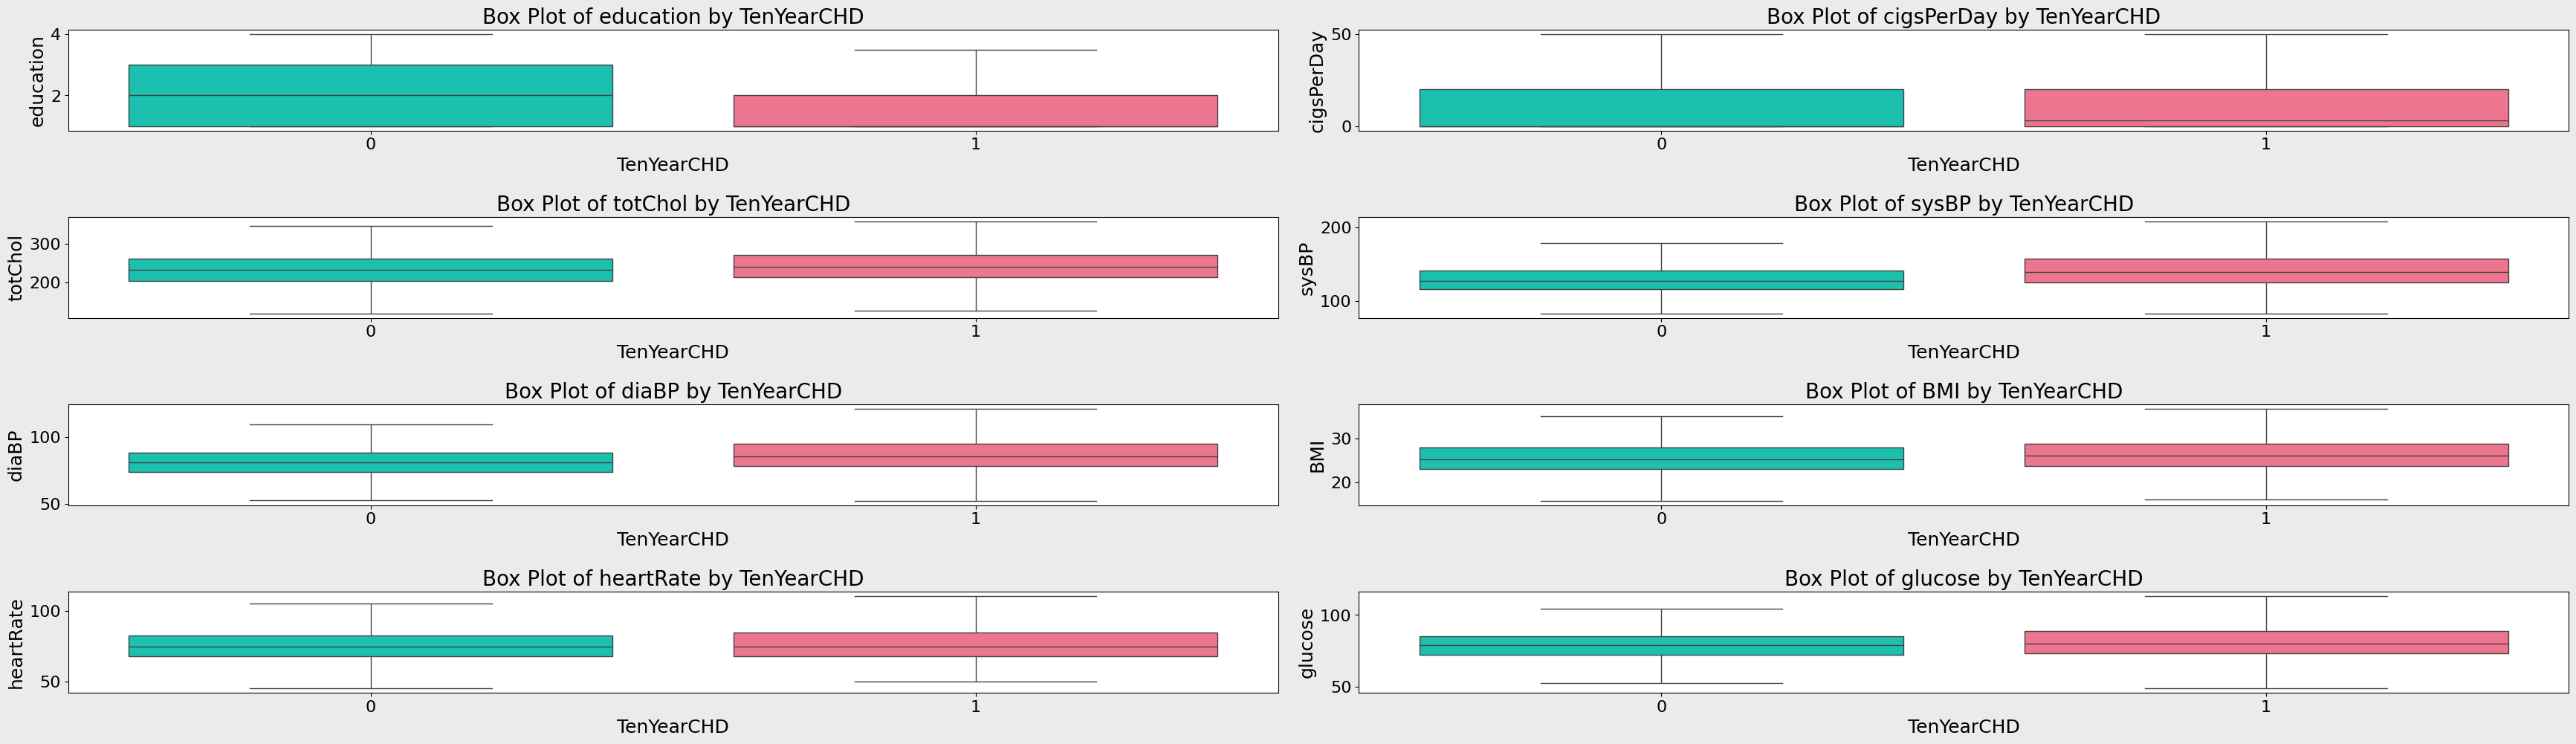

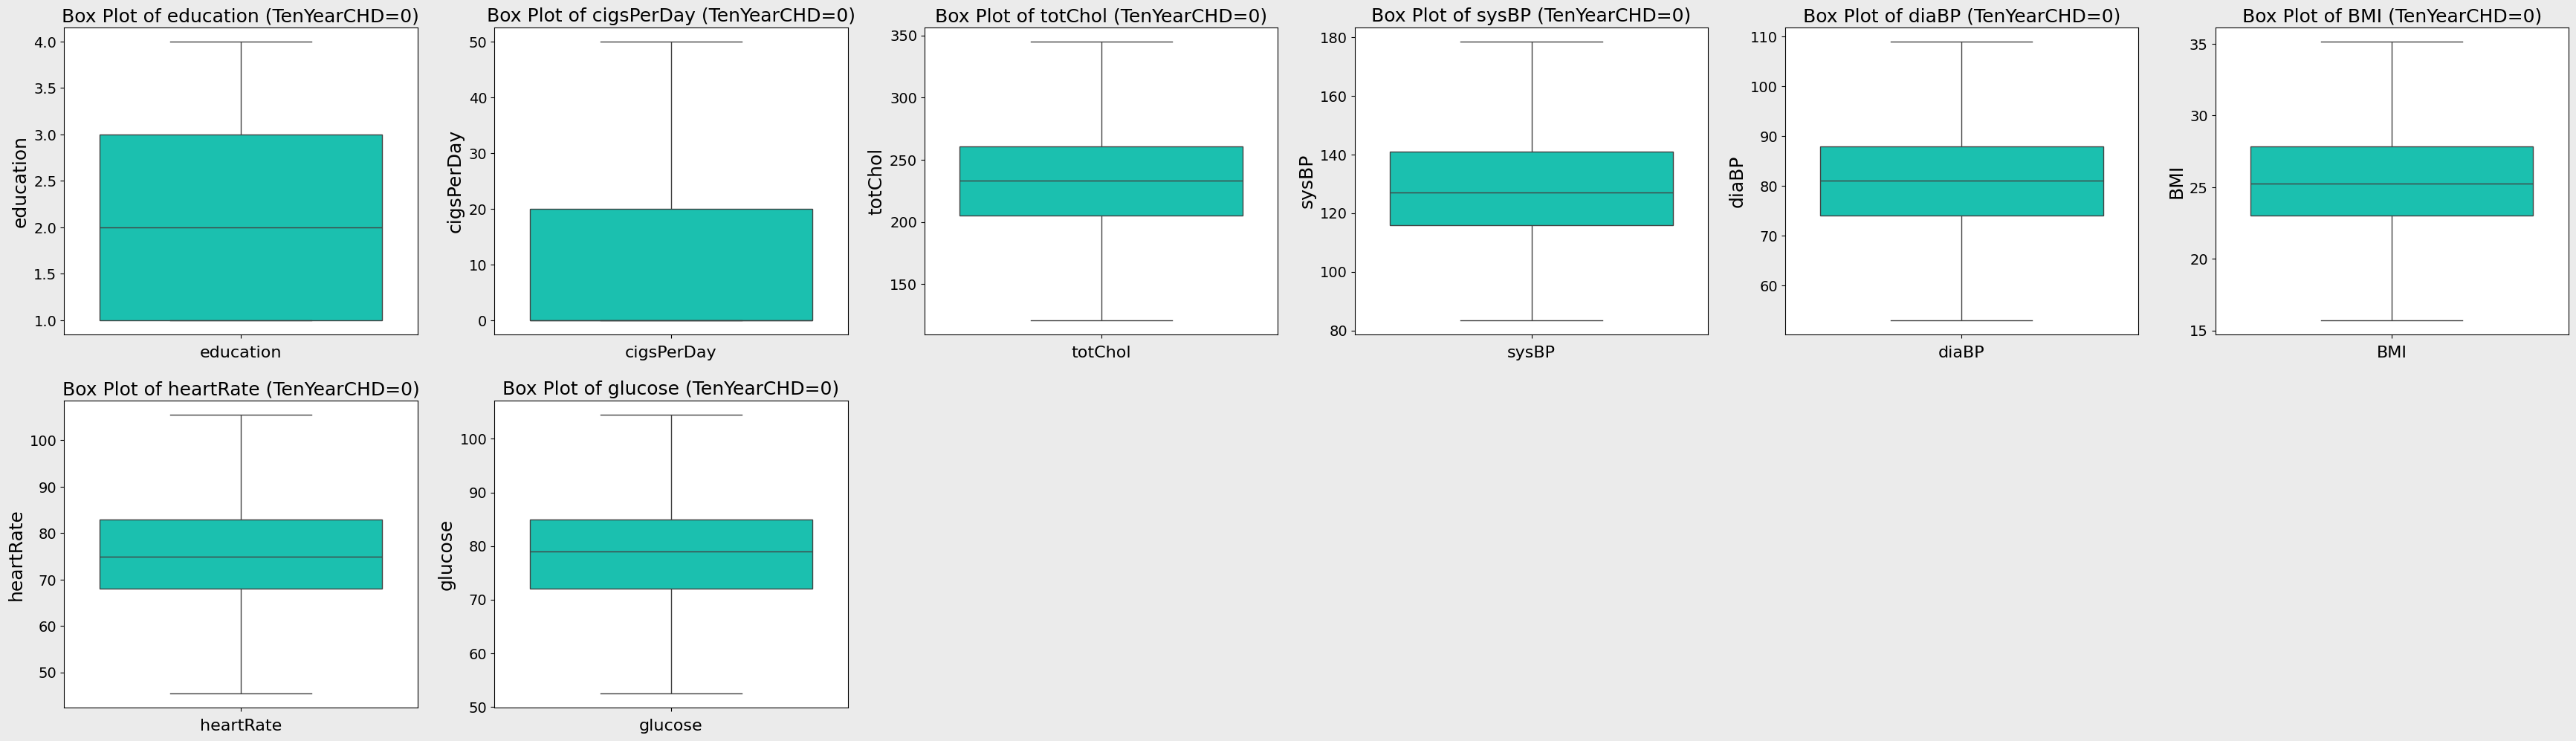

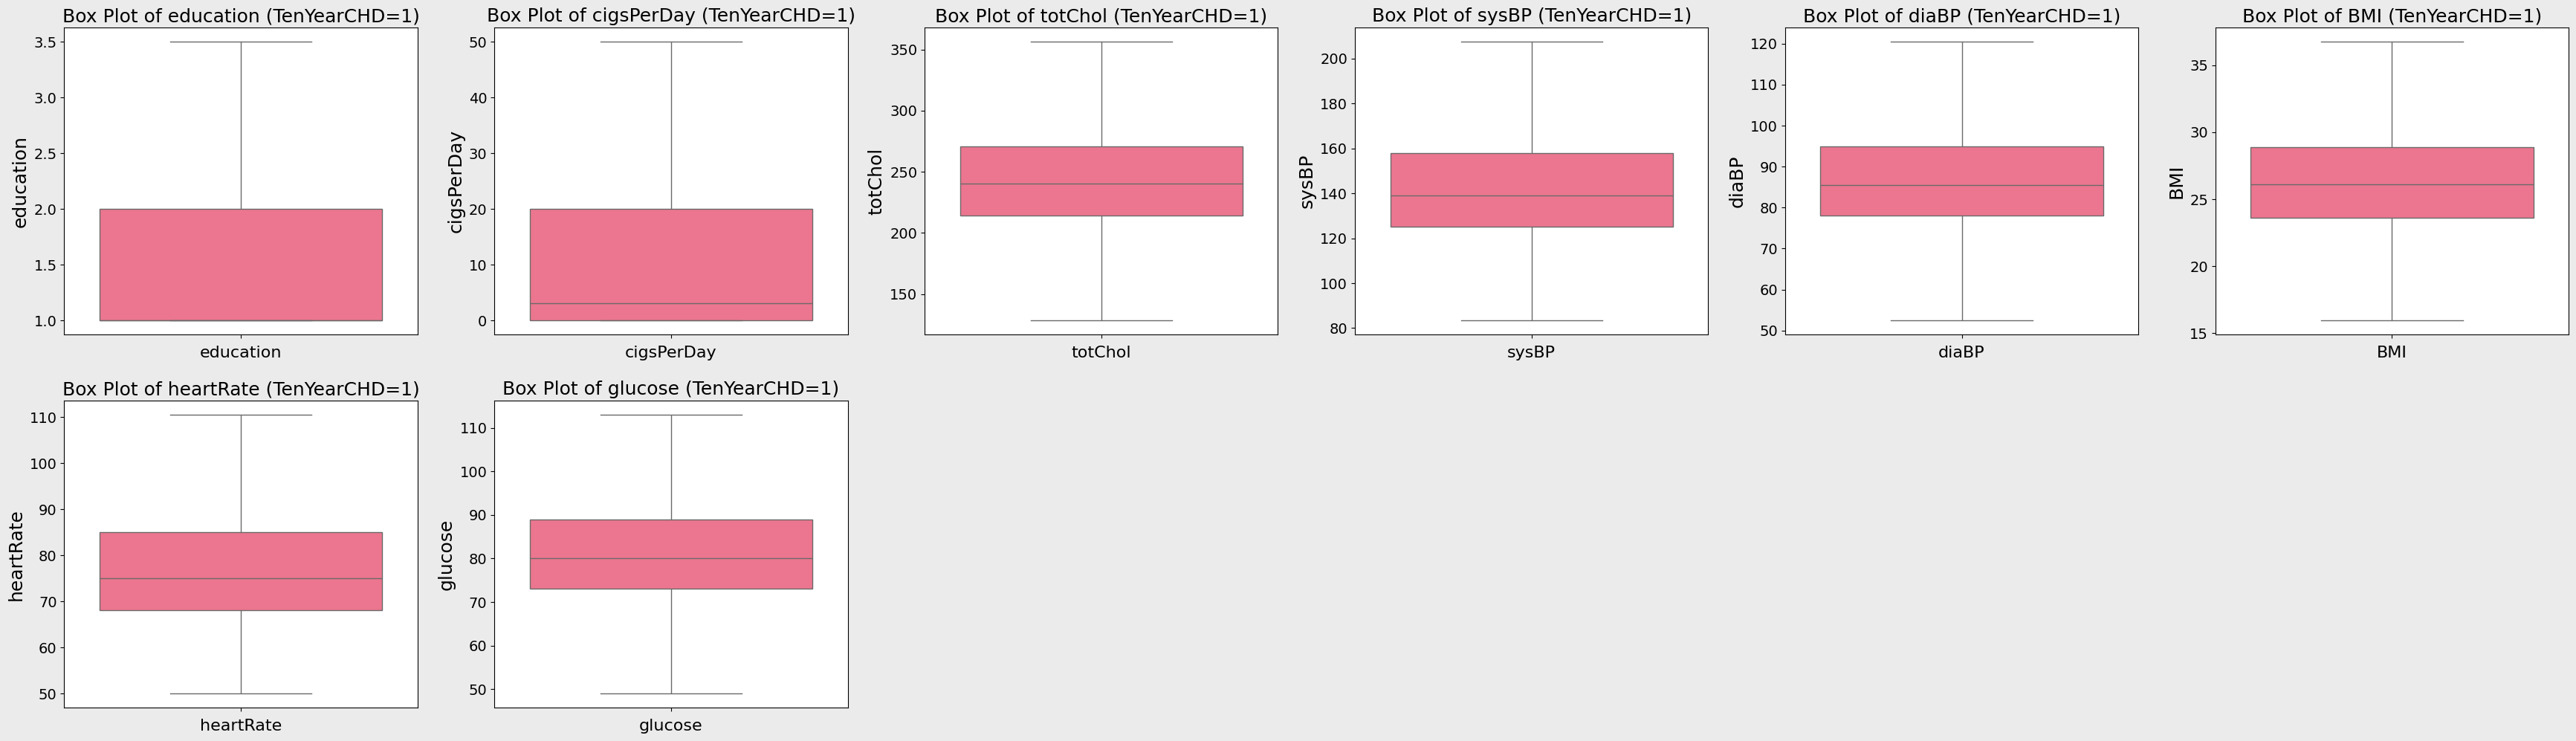

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(35, 40))
fig.set_facecolor((235/255, 235/255, 235/255))
index = 1
target_col = 'TenYearCHD'
for k in health_data_filled_with_mean:
    if health_data_filled_with_mean[k].dtype == 'float64':
        plt.subplot(len(numerical_features), 2, index)
        sns.boxplot(
            x=health_data_filled_with_mean[target_col].astype(str),
            y=health_data_filled_with_mean[k],
            palette={'0': (0/255, 219/255, 197/255), '1': (255/255, 99/255, 132/255)}
        )
        plt.title(f'Box Plot of {k} by {target_col}', fontsize=20)  
        plt.xlabel('TenYearCHD', fontsize=18)
        plt.ylabel(k, fontsize=18)  
        plt.xticks(fontsize=16)  
        plt.yticks(fontsize=16)  
        index += 1

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(35, 20))
fig.set_facecolor((235/255, 235/255, 235/255))
index = 1

for k in group_0:
    if group_0[k].dtype == 'float64':
        plt.subplot(4, 6, index)
        sns.boxplot(group_0[k], color=(0/255, 219/255, 197/255))
        plt.title(f'Box Plot of {k} (TenYearCHD=0)', fontsize=18)
        plt.xlabel(k, fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        index += 1

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(35, 20))
fig.set_facecolor((235/255, 235/255, 235/255))
index = 1

for k in group_1:
    if group_1[k].dtype == 'float64':
        plt.subplot(4, 6, index)
        sns.boxplot(group_1[k], color=(255/255, 99/255, 132/255))
        plt.title(f'Box Plot of {k} (TenYearCHD=1)', fontsize=18)
        plt.xlabel(k, fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        index += 1

plt.tight_layout()
plt.show()


In [69]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(health_data_filled_with_mean)
scaled_data = pd.DataFrame(scaled_data, columns=health_data_filled_with_mean.columns)
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   float64
dtypes: float64(16)
memory usage: 530.1 KB


In [70]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(health_data_filled_with_mean)
scaled_data = pd.DataFrame(scaled_data, columns=health_data_filled_with_mean.columns)
scaled_data.info()

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = scaled_data.drop(columns=['TenYearCHD'])
y = scaled_data['TenYearCHD']

x_train, x_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train, y_train)

from collections import Counter
print('Original training dataset shape:', Counter(y_train))
print('Upsampled training dataset shape:', Counter(y_train_upsampled))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   float64
dtypes: float64(16)
memory usage: 530.1 KB
Original training data

# DT

Optimal parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
   Label Accuracy Precision Recall ROC AUC F1 Score
0  8:1:1    0.752     0.274  0.380   0.600    0.318


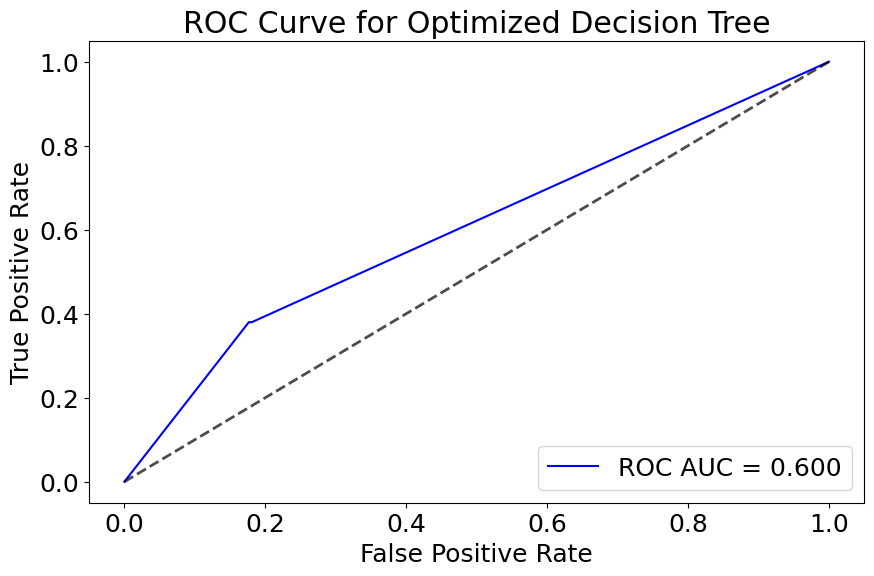

In [71]:
parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search for hyperparameter optimization
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=parameter_grid,
    cv=5,
    n_jobs=-1,
)

grid_search.fit(x_train_upsampled, y_train_upsampled)
best_params = grid_search.best_params_

print(f"Optimal parameters: {best_params}")

# Train the best decision tree classifier
best_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_classifier.fit(x_train_upsampled, y_train_upsampled)

# Evaluate the model on the validation set
y_pred = best_classifier.predict(x_validation)
y_pred_proba = best_classifier.predict_proba(x_validation)[:, 1]

# Calculate metrics
acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred)
recall = metrics.recall_score(y_validation, y_pred)
f1 = metrics.f1_score(y_validation, y_pred)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

# Store results in a DataFrame
results = [{
    'Label': '8:1:1',
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1)
}]

df = pd.DataFrame(results)
print(df[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])

# Plot the ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for Optimized Decision Tree")
plt.show()

# LR

Optimal parameters: {'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs'}
   Label Accuracy Precision Recall ROC AUC F1 Score
0  8:1:1    0.672     0.259  0.620   0.703    0.365


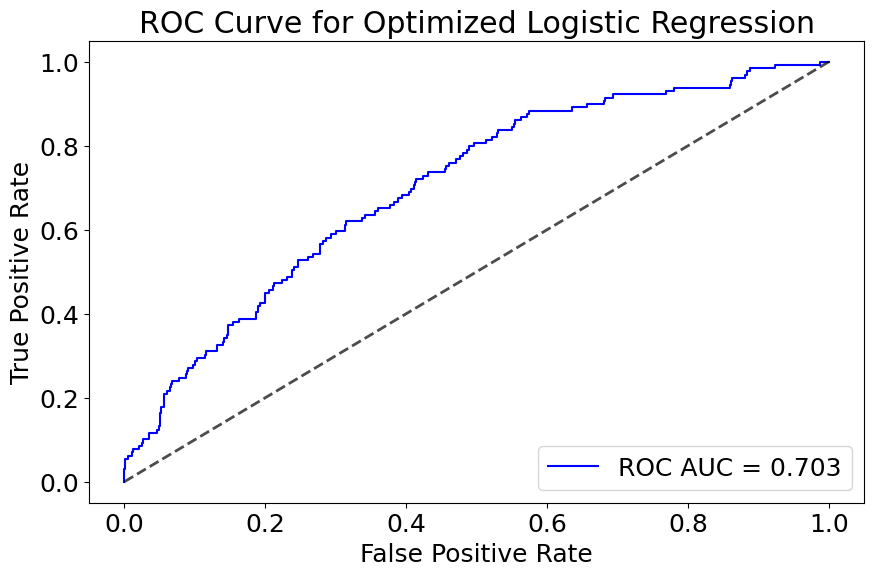

In [72]:
parameter_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Optimization solvers
    'max_iter': [1000]  # Maximum number of iterations
}

# Perform grid search for hyperparameter optimization
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=parameter_grid,
    cv=5,
    n_jobs=-1,
)
grid_search.fit(x_train_upsampled, y_train_upsampled)
best_params = grid_search.best_params_

print(f"Optimal parameters: {best_params}")

# Train the best Logistic Regression model
best_classifier = LogisticRegression(**best_params, random_state=42)
best_classifier.fit(x_train_upsampled, y_train_upsampled)

# Evaluate the model on the validation set
y_pred = best_classifier.predict(x_validation)
y_pred_proba = best_classifier.predict_proba(x_validation)[:, 1]

# Calculate metrics
acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred)
recall = metrics.recall_score(y_validation, y_pred)
f1 = metrics.f1_score(y_validation, y_pred)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

# Store results in a DataFrame
results = [{
    'Label': '8:1:1',
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1)
}]

df = pd.DataFrame(results)
print(df[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])

# Plot the ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for Optimized Logistic Regression")
plt.show()

# NB

Optimal parameters: {'alpha': 10, 'binarize': 0.5}
   Label Accuracy Precision Recall ROC AUC F1 Score
0  8:1:1    0.685     0.257  0.566   0.681    0.354


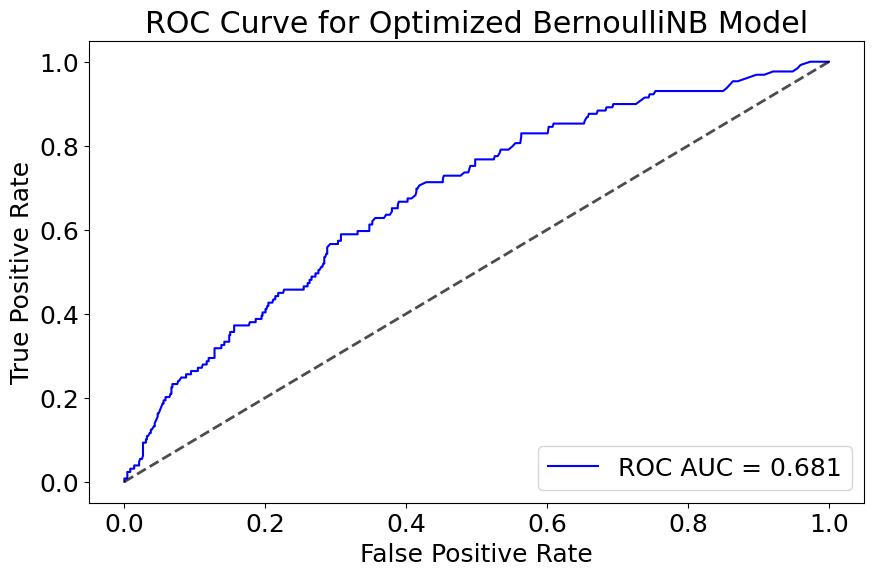

In [73]:
parameter_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'binarize': [0, 0.5, 1, 2]
}

grid_search = GridSearchCV(
    BernoulliNB(),
    param_grid=parameter_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search.fit(x_train_upsampled, y_train_upsampled)
best_params = grid_search.best_params_

print(f"Optimal parameters: {best_params}")

best_nb = BernoulliNB(**best_params)
best_nb.fit(x_train_upsampled, y_train_upsampled)

y_pred = best_nb.predict(x_validation)
y_pred_proba = best_nb.predict_proba(x_validation)[:, 1]

acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred)
recall = metrics.recall_score(y_validation, y_pred)
f1 = metrics.f1_score(y_validation, y_pred)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

results = [{
    'Label': '8:1:1',
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1)
}]

df = pd.DataFrame(results)
print(df[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])

# Plot the ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for Optimized BernoulliNB Model")
plt.show()

# KNN

Optimal parameters: {'n_neighbors': 80, 'p': 1, 'weights': 'distance'}
  Label Accuracy Precision Recall ROC AUC F1 Score
0   8:2    0.612     0.237  0.698   0.684    0.354


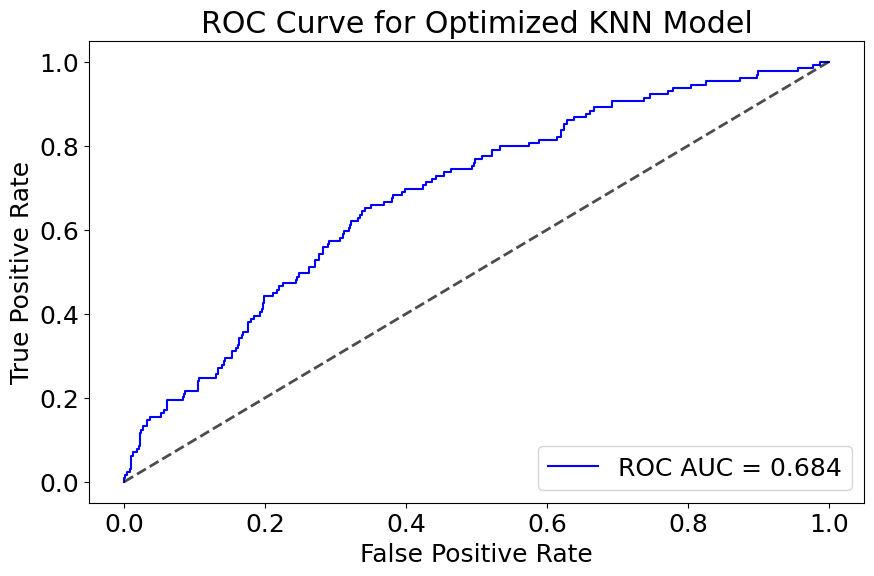

In [74]:
parameter_grid = {
    'n_neighbors': [80, 100, 200],
    'p': [1, 2],  # 1: Manhattan distance, 2: Euclidean distance
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=parameter_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)
grid_search.fit(x_train_upsampled, y_train_upsampled)
best_params = grid_search.best_params_

print(f"Optimal parameters: {best_params}")

# Train the optimal classifier
knn_optimal = KNeighborsClassifier(**best_params)
knn_optimal.fit(x_train_upsampled, y_train_upsampled)

# Predict on validation set
y_pred = knn_optimal.predict(x_validation)
y_pred_proba = knn_optimal.predict_proba(x_validation)[:, 1]

# Calculate metrics
acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred)
recall = metrics.recall_score(y_validation, y_pred)
f1 = metrics.f1_score(y_validation, y_pred)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

results = [{
    'Label': '8:2',
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1)
}]


# Create DataFrame for metrics
df_metrics = pd.DataFrame(results)
print(df_metrics[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])

# Plot the ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for Optimized KNN Model")
plt.show()


# GB

Optimal parameters: {'learning_rate': 0.1, 'n_estimators': 500}
   Label Accuracy Precision Recall ROC AUC F1 Score
0  8:1:1    0.860     0.556  0.388   0.771    0.457


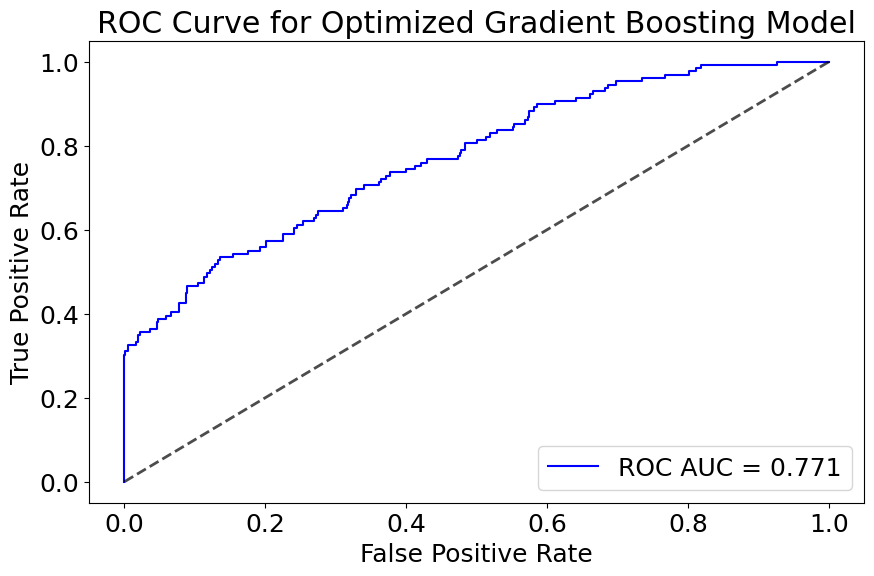

In [75]:
# parameter_grid = {
#     'n_estimators': [10, 100, 1000, 1200],
#     'learning_rate': [0.1, 0.2, 0.4, 0.8]
# }

parameter_grid = {
    'n_estimators': [10, 100, 500],
    'learning_rate': [0.1, 0.2, 0.4]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=parameter_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
)

grid_search.fit(x_train_upsampled, y_train_upsampled)
best_params = grid_search.best_params_

print(f"Optimal parameters: {best_params}")

gb_optimal = GradientBoostingClassifier(**best_params, random_state=42)
gb_optimal.fit(x_train_upsampled, y_train_upsampled)

y_pred = gb_optimal.predict(x_validation)
y_pred_proba = gb_optimal.predict_proba(x_validation)[:, 1]

acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred)
recall = metrics.recall_score(y_validation, y_pred)
f1 = metrics.f1_score(y_validation, y_pred)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

results = [{
    'Label': '8:1:1',
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1)
}]

df_metrics = pd.DataFrame(results)
print(df_metrics[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])

# Plot the ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for Optimized Gradient Boosting Model")
plt.show()

# ElasticNet

Optimal parameters: {'C': 100, 'class_weight': 'balanced', 'l1_ratio': 0.0001, 'max_iter': 1000, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.0001}
   Label Accuracy Precision Recall ROC AUC F1 Score
0  8:1:1    0.670     0.254  0.605   0.700    0.358


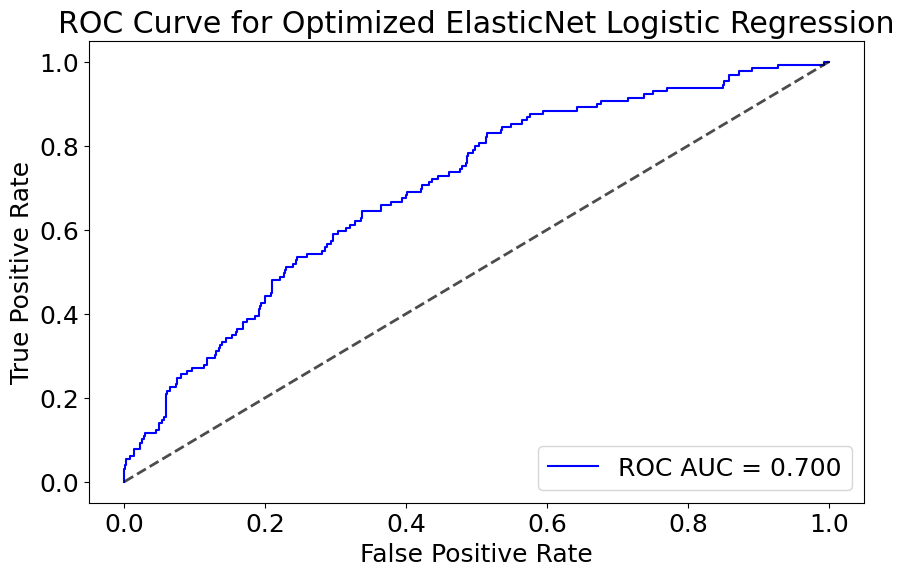

In [76]:
parameter_grid = {
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'C': [10, 50, 100,300, 500],
    'l1_ratio': [0.0001, 0.001, 0.01],
    'max_iter': [1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced'],
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=parameter_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)
grid_search.fit(x_train_upsampled, y_train_upsampled)
best_params = grid_search.best_params_

print(f"Optimal parameters: {best_params}")

best_classifier = LogisticRegression(**best_params, random_state=42)
best_classifier.fit(x_train_upsampled, y_train_upsampled)

y_pred = best_classifier.predict(x_validation)
y_pred_proba = best_classifier.predict_proba(x_validation)[:, 1]

acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred)
recall = metrics.recall_score(y_validation, y_pred)
f1 = metrics.f1_score(y_validation, y_pred)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

results = [{
    'Label': '8:1:1',
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1),
    'fpr': fpr,
    'tpr': tpr
}]

df = pd.DataFrame(results)
print(df[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])


# Plot the ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for Optimized ElasticNet Logistic Regression")
plt.show()

# MLP


Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.01; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.01; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.001; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.001; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.001; total time=   1.2s
[CV] END 

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   1.9s


/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   1.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.3s


/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32)

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=   2.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=   2.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   0.1s
[CV] END act

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=   2.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.8s


/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s
[CV] END 

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.1s


/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_r

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=   2.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128,), learning_rate_init=0.001; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64,), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=relu, alp

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END ac

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   1.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.2s


/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; 

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.01; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.2s


/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32), 

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=   2.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s


/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   0.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.1; total time=   0.2s
[CV]

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   2.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(128,), learning_rate_init=

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001; total time=   2.5s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=   1.

/Users/albert/Desktop/heart/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   0.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64), learning_rate

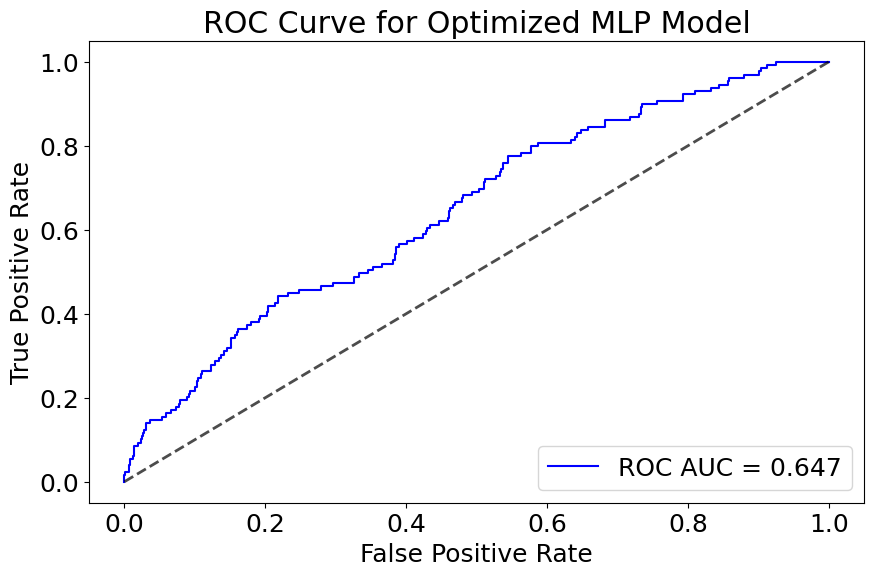

In [77]:
train_size = 0.8
test_size = 0.1
validation_size = 0.1

parameter_grid = {
    'hidden_layer_sizes': [
        (128,),
        (64,),
        (128, 64),
        (64, 32),
        (128, 64, 32)
    ],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [ 0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(
    estimator=MLPClassifier(
        solver='adam',
        max_iter=200,
        random_state=42
    ),
    param_grid=parameter_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(x_train_upsampled, y_train_upsampled)


best_params = grid_search.best_params_
print(f"Optimal parameters: {best_params}")


mlp_optimal = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver='adam',
    learning_rate_init=best_params['learning_rate_init'],
    alpha=best_params['alpha'],
    max_iter=300,
    random_state=42
)
mlp_optimal.fit(x_train_upsampled, y_train_upsampled)


y_pred = mlp_optimal.predict(x_validation)
y_pred_proba = mlp_optimal.predict_proba(x_validation)[:, 1]


acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred, zero_division=0)
recall = metrics.recall_score(y_validation, y_pred, zero_division=0)
f1 = metrics.f1_score(y_validation, y_pred, zero_division=0)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)


results = [{
    'Label': '8:1:1',
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1),
    'fpr': fpr,
    'tpr': tpr
}]


df_metrics = pd.DataFrame(results)
print(df_metrics[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])


fig, ax = plt.subplots(figsize=(10,  6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')

ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for Optimized MLP Model")

plt.show()

# Transformer

   Label Accuracy Precision Recall ROC AUC F1 Score
0  8:1:1    0.666     0.229  0.504   0.669    0.315


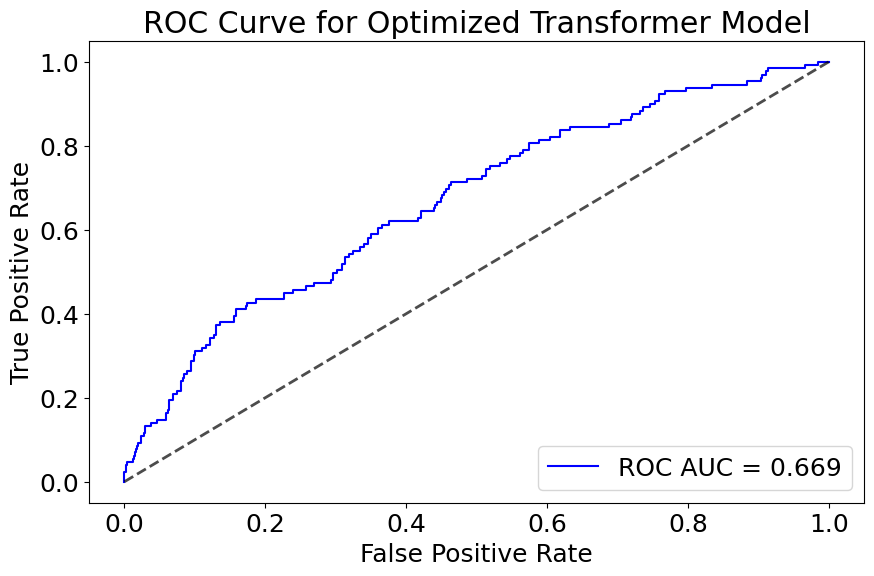

In [78]:
# only nn.TransformerEncoder and nn.TransformerEncoderLayer
train_size = 0.8
test_size = 0.1
validation_size = 0.1

class SimpleTransformerClassifier(nn.Module):
    def __init__(self, n_features, embed_dim=32, nhead=4, num_layers=2, dim_feedforward=64, activation='relu'):
        super().__init__()
        self.n_features = n_features
        self.embed_dim = embed_dim

        self.feature_proj = nn.Linear(n_features, embed_dim)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            batch_first=True,
            activation=activation
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.fc = nn.Linear(embed_dim, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        batch_size = x.size(0)
        proj = self.feature_proj(x)
        proj = proj.view(batch_size, self.n_features, self.embed_dim)

        encoded = self.transformer_encoder(proj)

        pooled = encoded.mean(dim=1)
        logit = self.fc(pooled)
        prob = self.sigmoid(logit)
        return prob


class PyTorchTransformerClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self,
                 embed_dim=32, nhead=4, num_layers=2, dim_feedforward=64,
                 learning_rate=0.001, max_iter=200, device='cpu', activation='relu'):
        self.embed_dim = embed_dim
        self.nhead = nhead
        self.num_layers = num_layers
        self.dim_feedforward = dim_feedforward
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.device = device
        self.activation = activation
        self.model_ = None
        self.n_features_ = None

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1).to(self.device)

        self.model_ = SimpleTransformerClassifier(
            n_features=self.n_features_,
            embed_dim=self.embed_dim,
            nhead=self.nhead,
            num_layers=self.num_layers,
            dim_feedforward=self.dim_feedforward,
            activation=self.activation
        ).to(self.device)

        self.model_.feature_proj = nn.Linear(self.n_features_, self.n_features_*self.embed_dim).to(self.device)

        optimizer = optim.Adam(self.model_.parameters(), lr=self.learning_rate)
        criterion = nn.BCELoss()

        self.model_.train()
        for epoch in range(self.max_iter):
            optimizer.zero_grad()
            outputs = self.model_(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()
        return self

    def predict_proba(self, X):
        self.model_.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            pred = self.model_(X_tensor).cpu().numpy()
        return np.hstack([1 - pred, pred])

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= 0.5).astype(int)




transformer_optimal = PyTorchTransformerClassifier(
    embed_dim=16,
    nhead=4,
    num_layers=1,
    dim_feedforward=64,
    learning_rate=1e-3,
    max_iter=200,
    activation='relu',
    device='cpu'
)

x_train_upsampled = x_train_upsampled.values if hasattr(x_train_upsampled, 'values') else x_train_upsampled
x_validation = x_validation.values if hasattr(x_validation, 'values') else x_validation
y_train_upsampled = y_train_upsampled.values if hasattr(y_train_upsampled, 'values') else y_train_upsampled
y_validation = y_validation.values if hasattr(y_validation, 'values') else y_validation

transformer_optimal.fit(x_train_upsampled, y_train_upsampled)

y_pred = transformer_optimal.predict(x_validation)
y_pred_proba = transformer_optimal.predict_proba(x_validation)[:, 1]

acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred, zero_division=0)
recall = metrics.recall_score(y_validation, y_pred, zero_division=0)
f1 = metrics.f1_score(y_validation, y_pred, zero_division=0)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

results = [{
    'Label': "8:1:1",
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1),
    'fpr': fpr,
    'tpr': tpr
}]

df_metrics = pd.DataFrame(results)
print(df_metrics[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for Optimized Transformer Model")
plt.show()

# KAN

   Label Accuracy Precision Recall ROC AUC F1 Score
0  8:1:1    0.762     0.332  0.558   0.751    0.416


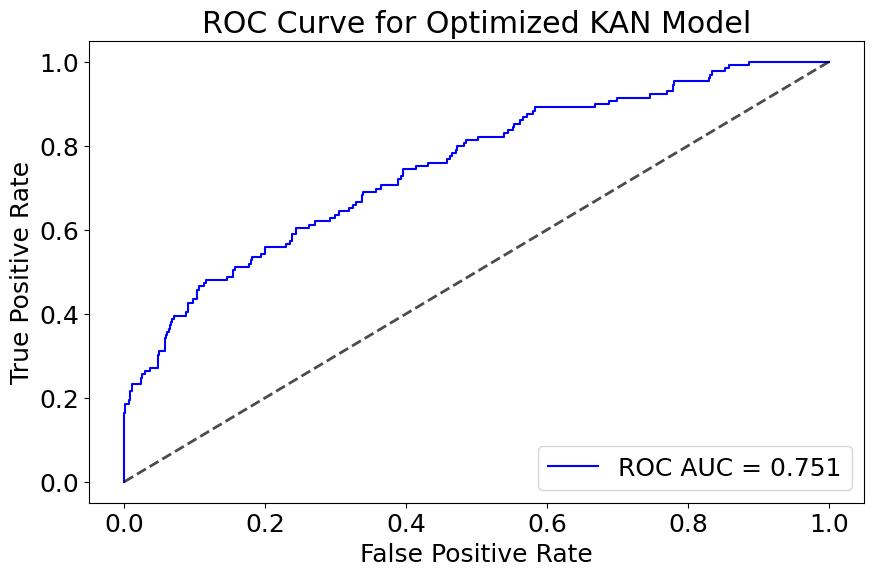

In [79]:
train_size = 0.8
test_size = 0.1
validation_size = 0.1

class UnivariateMLP(nn.Module):
    def __init__(self, hidden_dim=32, activation='relu'):
        super().__init__()
        act_map = {
            'relu': nn.ReLU(),
            'tanh': nn.Tanh(),
            'gelu': nn.GELU()
        }
        self.net = nn.Sequential(
            nn.Linear(1, hidden_dim),
            act_map.get(activation, nn.ReLU()),
            nn.Linear(hidden_dim, hidden_dim),
            act_map.get(activation, nn.ReLU()),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        # x: [batch_size, 1]
        return self.net(x)

class KANModel(nn.Module):
    def __init__(self, n_features, Q=2, hidden_dim=32, activation='relu'):
        super().__init__()
        self.n_features = n_features
        self.Q = Q
        self.hidden_dim = hidden_dim

        self.psi_funcs = nn.ModuleList([
            nn.ModuleList([UnivariateMLP(hidden_dim, activation) for _ in range(n_features)])
            for _ in range(Q)
        ])

        # phi_q
        self.phi_funcs = nn.ModuleList([
            UnivariateMLP(hidden_dim, activation) for _ in range(Q)
        ])

        self.fc = nn.Linear(Q, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x: [batch_size, n_features]
        batch_size = x.size(0)
        z_list = []
        for q in range(self.Q):
            sum_over_p = 0
            for p in range(self.n_features):
                xp = x[:, p:p+1]
                val = self.psi_funcs[q][p](xp)
                sum_over_p = sum_over_p + val
            phi_val = self.phi_funcs[q](sum_over_p) # [batch_size,1]
            z_list.append(phi_val)

        Z = torch.cat(z_list, dim=1)

        logit = self.fc(Z) # [batch_size,1]
        prob = self.sigmoid(logit)
        return prob


class PyTorchKANClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, Q=2, hidden_dim=32, activation='relu',
                 learning_rate=0.001, max_iter=100, device='cpu'):
        self.Q = Q
        self.hidden_dim = hidden_dim
        self.activation = activation
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.device = device
        self.model_ = None
        self.n_features_ = None

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1).to(self.device)

        self.model_ = KANModel(
            n_features=self.n_features_,
            Q=self.Q,
            hidden_dim=self.hidden_dim,
            activation=self.activation
        ).to(self.device)

        optimizer = optim.Adam(self.model_.parameters(), lr=self.learning_rate)
        criterion = nn.BCELoss()

        self.model_.train()
        for epoch in range(self.max_iter):
            optimizer.zero_grad()
            outputs = self.model_(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()
        return self

    def predict_proba(self, X):
        self.model_.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            pred = self.model_(X_tensor).cpu().numpy() # [batch_size,1]
        return np.hstack([1 - pred, pred])

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= 0.5).astype(int)


kan_optimal = PyTorchKANClassifier(
    Q=2,
    hidden_dim=64,
    activation='relu',
    learning_rate=1e-3,
    max_iter=1000,
    device='cpu'
)

x_train_upsampled = x_train_upsampled.values if hasattr(x_train_upsampled, 'values') else x_train_upsampled
x_validation = x_validation.values if hasattr(x_validation, 'values') else x_validation
y_train_upsampled = y_train_upsampled.values if hasattr(y_train_upsampled, 'values') else y_train_upsampled
y_validation = y_validation.values if hasattr(y_validation, 'values') else y_validation

kan_optimal.fit(x_train_upsampled, y_train_upsampled)


y_pred = kan_optimal.predict(x_validation)
y_pred_proba = kan_optimal.predict_proba(x_validation)[:, 1]

acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred, zero_division=0)
recall = metrics.recall_score(y_validation, y_pred, zero_division=0)
f1 = metrics.f1_score(y_validation, y_pred, zero_division=0)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

results = [{
    'Label': "8:1:1",
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1),
    'fpr': fpr,
    'tpr': tpr
}]

df_metrics = pd.DataFrame(results)
print(df_metrics[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for Optimized KAN Model")
plt.show()

# RNN

   Label Accuracy Precision Recall ROC AUC F1 Score
0  8:1:1    0.666     0.253  0.612   0.704    0.358


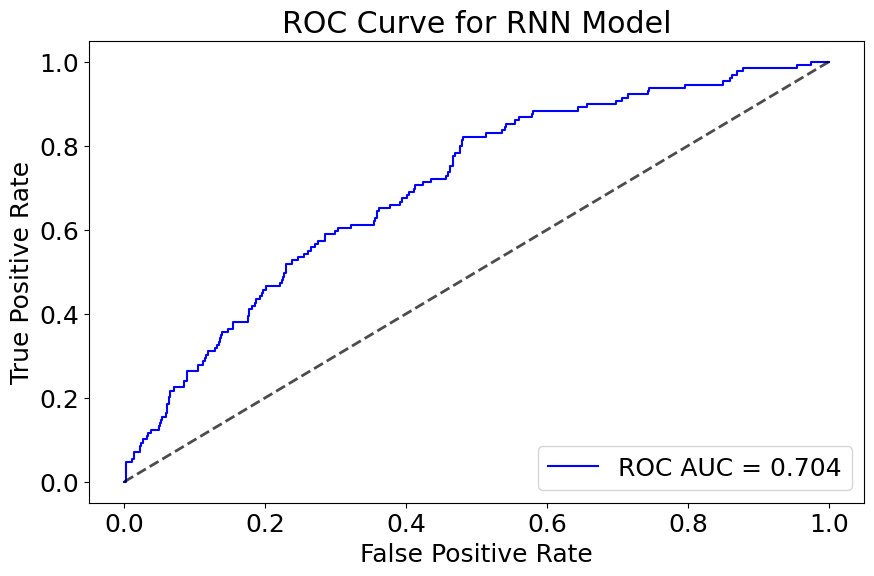

In [80]:
train_size = 0.8
test_size = 0.1
validation_size = 0.1

class SimpleRNNClassifier(nn.Module):
    def __init__(self, n_features, hidden_size=32, num_layers=1, activation='relu'):
        super().__init__()
        self.n_features = n_features
        self.hidden_size = hidden_size
        self.num_layers = num_layers


        self.rnn = nn.RNN(input_size=1, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)


        self.fc = nn.Linear(hidden_size, 1)


        act_map = {
            'relu': nn.ReLU(),
            'tanh': nn.Tanh(),
            'gelu': nn.GELU()
        }
        self.activation = act_map.get(activation, nn.ReLU())

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        batch_size = x.size(0)
        seq_len = self.n_features
        # reshape x => [batch_size, seq_len, 1]
        x_seq = x.view(batch_size, seq_len, 1)


        rnn_out, h = self.rnn(x_seq)  # rnn_out: [batch_size, seq_len, hidden_size]


        out = rnn_out[:, -1, :]

        logit = self.fc(out)
        prob = self.sigmoid(logit)
        return prob


class PyTorchRNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_size=32, num_layers=1, activation='relu',
                 learning_rate=0.001, max_iter=200, device='cpu'):
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.activation = activation
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.device = device
        self.model_ = None
        self.n_features_ = None

    def fit(self, X, y):
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values

        self.n_features_ = X.shape[1]
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1).to(self.device)

        self.model_ = SimpleRNNClassifier(
            n_features=self.n_features_,
            hidden_size=self.hidden_size,
            num_layers=self.num_layers,
            activation=self.activation
        ).to(self.device)

        optimizer = optim.Adam(self.model_.parameters(), lr=self.learning_rate)
        criterion = nn.BCELoss()

        self.model_.train()
        for epoch in range(self.max_iter):
            optimizer.zero_grad()
            outputs = self.model_(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()
        return self

    def predict_proba(self, X):
        if hasattr(X, 'values'):
            X = X.values
        self.model_.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            pred = self.model_(X_tensor).cpu().numpy()
        return np.hstack([1 - pred, pred])

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= 0.5).astype(int)


rnn_optimal = PyTorchRNNClassifier(
    hidden_size=64,
    num_layers=2,
    activation='relu',
    learning_rate=1e-3,
    max_iter=200,
    device='cpu'
)

x_train_upsampled = x_train_upsampled.values if hasattr(x_train_upsampled, 'values') else x_train_upsampled
x_validation = x_validation.values if hasattr(x_validation, 'values') else x_validation
y_train_upsampled = y_train_upsampled.values if hasattr(y_train_upsampled, 'values') else y_train_upsampled
y_validation = y_validation.values if hasattr(y_validation, 'values') else y_validation

rnn_optimal.fit(x_train_upsampled, y_train_upsampled)

y_pred = rnn_optimal.predict(x_validation)
y_pred_proba = rnn_optimal.predict_proba(x_validation)[:, 1]

acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred, zero_division=0)
recall = metrics.recall_score(y_validation, y_pred, zero_division=0)
f1 = metrics.f1_score(y_validation, y_pred, zero_division=0)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

results = [{
    'Label': "8:1:1",
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1),
    'fpr': fpr,
    'tpr': tpr
}]

df_metrics = pd.DataFrame(results)
print(df_metrics[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for RNN Model")
plt.show()

# CNN

Epoch [10/200], Loss: 0.6326
Epoch [20/200], Loss: 0.6276
Epoch [30/200], Loss: 0.6243
Epoch [40/200], Loss: 0.6203
Epoch [50/200], Loss: 0.6170
Epoch [60/200], Loss: 0.6114
Epoch [70/200], Loss: 0.6071
Epoch [80/200], Loss: 0.6046
Epoch [90/200], Loss: 0.6021
Epoch [100/200], Loss: 0.6004
Epoch [110/200], Loss: 0.5994
Epoch [120/200], Loss: 0.5988
Epoch [130/200], Loss: 0.5984
Epoch [140/200], Loss: 0.5982
Epoch [150/200], Loss: 0.5979
Epoch [160/200], Loss: 0.5977
Epoch [170/200], Loss: 0.5978
Epoch [180/200], Loss: 0.5978
Epoch [190/200], Loss: 0.5977
Epoch [200/200], Loss: 0.5979
   Label Accuracy Precision Recall ROC AUC F1 Score
0  8:1:1    0.603     0.225  0.659   0.666    0.335


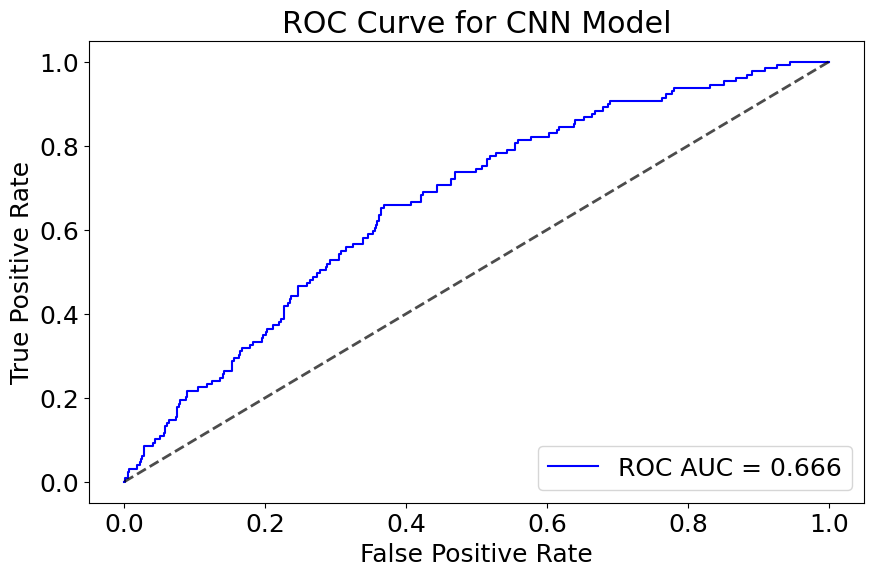

In [81]:
train_size = 0.8
test_size = 0.1
validation_size = 0.1

class SimpleCNNClassifier(nn.Module):
    def __init__(self, n_features, num_filters=32, kernel_size=3, activation='relu'):
        super().__init__()
        self.n_features = n_features
        self.num_filters = num_filters
        self.kernel_size = kernel_size

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=num_filters, kernel_size=kernel_size, padding='same')


        act_map = {
            'relu': nn.ReLU(),
            'tanh': nn.Tanh(),
            'gelu': nn.GELU()
        }
        self.activation = act_map.get(activation, nn.ReLU())


        self.pool = nn.AdaptiveAvgPool1d(output_size=1)

        self.fc = nn.Linear(num_filters, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x: [batch_size, n_features]
        batch_size = x.size(0)
        x = x.view(batch_size, 1, self.n_features)  # [batch_size, 1, n_features]

        out = self.conv1(x)  # [batch_size, num_filters, n_features]
        out = self.activation(out)
        out = self.pool(out) # [batch_size, num_filters, 1]

        out = out.squeeze(-1) # [batch_size, num_filters]
        logit = self.fc(out)  # [batch_size, 1]
        prob = self.sigmoid(logit)
        return prob


class PyTorchCNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, num_filters=32, kernel_size=3, activation='relu',
                 learning_rate=0.001, max_iter=100, batch_size=64, device='cpu'):
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.activation = activation
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.device = device
        self.model_ = None
        self.n_features_ = None

    def fit(self, X, y):
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values

        self.n_features_ = X.shape[1]
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1).to(self.device)

        self.model_ = SimpleCNNClassifier(
            n_features=self.n_features_,
            num_filters=self.num_filters,
            kernel_size=self.kernel_size,
            activation=self.activation
        ).to(self.device)

        optimizer = optim.Adam(self.model_.parameters(), lr=self.learning_rate)
        criterion = nn.BCELoss()

        self.model_.train()
        for epoch in range(self.max_iter):
            for i in range(0, X_tensor.size(0), self.batch_size):
                batch_x = X_tensor[i:i+self.batch_size]
                batch_y = y_tensor[i:i+self.batch_size]

                optimizer.zero_grad()
                outputs = self.model_(batch_x)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()

            if (epoch+1) % 10 == 0:
                print(f"Epoch [{epoch+1}/{self.max_iter}], Loss: {loss.item():.4f}")

        return self

    def predict_proba(self, X):
        if hasattr(X, 'values'):
            X = X.values
        self.model_.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            pred = self.model_(X_tensor).cpu().numpy()
        return np.hstack([1 - pred, pred])

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= 0.5).astype(int)


cnn_clf = PyTorchCNNClassifier(
    num_filters=32,
    kernel_size=3,
    activation='relu',
    learning_rate=1e-3,
    max_iter=200,
    batch_size=64,
    device='cpu'
)

x_train_upsampled = x_train_upsampled.values if hasattr(x_train_upsampled, 'values') else x_train_upsampled
x_validation = x_validation.values if hasattr(x_validation, 'values') else x_validation
y_train_upsampled = y_train_upsampled.values if hasattr(y_train_upsampled, 'values') else y_train_upsampled
y_validation = y_validation.values if hasattr(y_validation, 'values') else y_validation

cnn_clf.fit(x_train_upsampled, y_train_upsampled)

y_pred = cnn_clf.predict(x_validation)
y_pred_proba = cnn_clf.predict_proba(x_validation)[:, 1]

acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred, zero_division=0)
recall = metrics.recall_score(y_validation, y_pred, zero_division=0)
f1 = metrics.f1_score(y_validation, y_pred, zero_division=0)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

results = [{
    'Label': "8:1:1",
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1),
    'fpr': fpr,
    'tpr': tpr
}]

df_metrics = pd.DataFrame(results)
print(df_metrics[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for CNN Model")
plt.show()

# Resnet

Epoch [10/200], Loss: 0.5251
Epoch [20/200], Loss: 0.4925
Epoch [30/200], Loss: 0.4629
Epoch [40/200], Loss: 0.3442
Epoch [50/200], Loss: 0.1515
Epoch [60/200], Loss: 0.0370
Epoch [70/200], Loss: 0.0099
Epoch [80/200], Loss: 0.0047
Epoch [90/200], Loss: 0.0028
Epoch [100/200], Loss: 0.0016
Epoch [110/200], Loss: 0.0013
Epoch [120/200], Loss: 0.0013
Epoch [130/200], Loss: 0.0006
Epoch [140/200], Loss: 0.0006
Epoch [150/200], Loss: 0.0004
Epoch [160/200], Loss: 0.0002
Epoch [170/200], Loss: 0.0001
Epoch [180/200], Loss: 0.0001
Epoch [190/200], Loss: 0.0003
Epoch [200/200], Loss: 0.0002
   Label Accuracy Precision Recall ROC AUC F1 Score
0  8:1:1    0.158     0.151  0.984   0.638    0.262


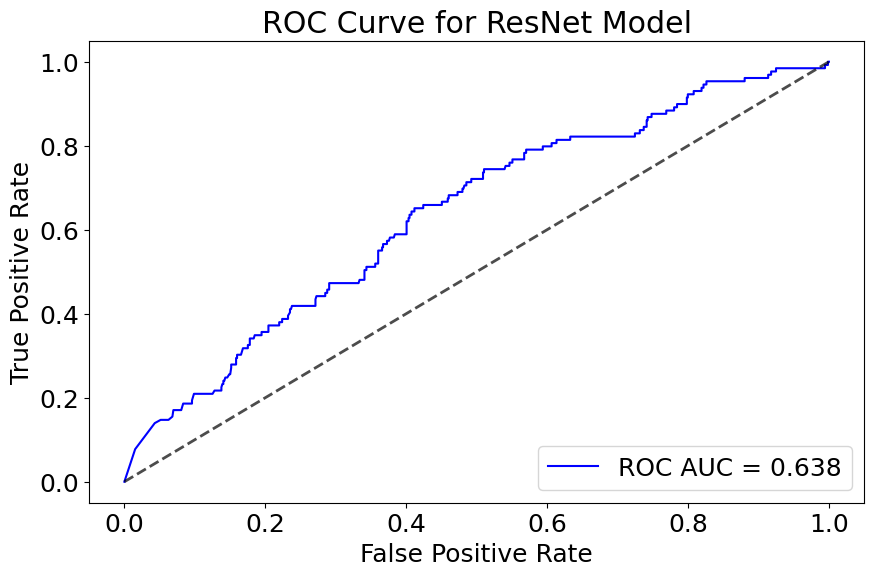

In [82]:
train_size = 0.8
test_size = 0.1
validation_size = 0.1

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, activation=nn.ReLU()):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding='same', bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.activation = activation
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding='same', bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)

        self.shortcut = nn.Sequential()
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1, bias=False),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.activation(out)

        out = self.conv2(out)
        out = self.bn2(out)

        shortcut = self.shortcut(x)

        out = out + shortcut
        out = self.activation(out)
        return out


class SimpleResNetClassifier(nn.Module):
    def __init__(self, n_features, num_blocks=2, hidden_dim=32, kernel_size=3, activation='relu'):
        super().__init__()
        act_map = {
            'relu': nn.ReLU(),
            'tanh': nn.Tanh(),
            'gelu': nn.GELU()
        }
        act = act_map.get(activation, nn.ReLU())

        self.conv_in = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=hidden_dim, kernel_size=kernel_size, padding='same', bias=False),
            nn.BatchNorm1d(hidden_dim),
            act
        )

        layers = []
        in_channels = hidden_dim
        out_channels = hidden_dim
        for i in range(num_blocks):
            layers.append(BasicBlock(in_channels, out_channels, kernel_size=kernel_size, activation=act))
            in_channels = out_channels

        self.blocks = nn.Sequential(*layers)

        self.pool = nn.AdaptiveAvgPool1d(output_size=1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x: [batch_size, n_features]
        batch_size, n_features = x.size()
        x = x.view(batch_size, 1, n_features)  # [batch_size, 1, n_features]

        out = self.conv_in(x)    # [batch_size, hidden_dim, n_features]
        out = self.blocks(out)   # [batch_size, hidden_dim, n_features]

        out = self.pool(out)     # [batch_size, hidden_dim, 1]
        out = out.squeeze(-1)    # [batch_size, hidden_dim]

        logit = self.fc(out)     # [batch_size, 1]
        prob = self.sigmoid(logit)
        return prob


class PyTorchResNetClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, num_blocks=2, hidden_dim=32, kernel_size=3, activation='relu',
                 learning_rate=0.001, max_iter=100, batch_size=64, device='cpu'):
        self.num_blocks = num_blocks
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size
        self.activation = activation
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.device = device
        self.model_ = None
        self.n_features_ = None

    def fit(self, X, y):
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values

        self.n_features_ = X.shape[1]
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1).to(self.device)

        self.model_ = SimpleResNetClassifier(
            n_features=self.n_features_,
            num_blocks=self.num_blocks,
            hidden_dim=self.hidden_dim,
            kernel_size=self.kernel_size,
            activation=self.activation
        ).to(self.device)

        optimizer = optim.Adam(self.model_.parameters(), lr=self.learning_rate)
        criterion = nn.BCELoss()

        self.model_.train()
        for epoch in range(self.max_iter):
            for i in range(0, X_tensor.size(0), self.batch_size):
                batch_x = X_tensor[i:i+self.batch_size]
                batch_y = y_tensor[i:i+self.batch_size]

                optimizer.zero_grad()
                outputs = self.model_(batch_x)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()

            if (epoch+1) % 10 == 0:
                print(f"Epoch [{epoch+1}/{self.max_iter}], Loss: {loss.item():.4f}")

        return self

    def predict_proba(self, X):
        if hasattr(X, 'values'):
            X = X.values
        self.model_.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            pred = self.model_(X_tensor).cpu().numpy()
        return np.hstack([1 - pred, pred])

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= 0.5).astype(int)


resnet_clf = PyTorchResNetClassifier(
    num_blocks=2,
    hidden_dim=32,
    kernel_size=3,
    activation='relu',
    learning_rate=1e-3,
    max_iter=200,
    batch_size=64,
    device='cpu'
)


x_train_upsampled = x_train_upsampled.values if hasattr(x_train_upsampled, 'values') else x_train_upsampled
x_validation = x_validation.values if hasattr(x_validation, 'values') else x_validation
y_train_upsampled = y_train_upsampled.values if hasattr(y_train_upsampled, 'values') else y_train_upsampled
y_validation = y_validation.values if hasattr(y_validation, 'values') else y_validation

resnet_clf.fit(x_train_upsampled, y_train_upsampled)

y_pred = resnet_clf.predict(x_validation)
y_pred_proba = resnet_clf.predict_proba(x_validation)[:, 1]

acc = metrics.accuracy_score(y_validation, y_pred)
precision = metrics.precision_score(y_validation, y_pred, zero_division=0)
recall = metrics.recall_score(y_validation, y_pred, zero_division=0)
f1 = metrics.f1_score(y_validation, y_pred, zero_division=0)
auc = metrics.roc_auc_score(y_validation, y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_validation, y_pred_proba)

results = [{
    'Label': "8:1:1",
    'Accuracy': "{:.3f}".format(acc),
    'Precision': "{:.3f}".format(precision),
    'Recall': "{:.3f}".format(recall),
    'ROC AUC': "{:.3f}".format(auc),
    'F1 Score': "{:.3f}".format(f1),
    'fpr': fpr,
    'tpr': tpr
}]

df_metrics = pd.DataFrame(results)
print(df_metrics[['Label', 'Accuracy', 'Precision', 'Recall', 'ROC AUC', 'F1 Score']])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}", color='b')
ax.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("ROC Curve for ResNet Model")
plt.show()